# Importing Necessary Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [15]:
file_path = '/content/drive/My Drive/compactiv.xlsx'
df = pd.read_excel(file_path)

## Loading the Dataset:

In [16]:
df

lread  lwrite  scall  sread  swrite  fork  exec     rchar    wchar  \
0         1       0   2147     79      68   0.2  0.20   40671.0  53995.0   
1         0       0    170     18      21   0.2  0.20     448.0   8385.0   
2        15       3   2162    159     119   2.0  2.40       NaN  31950.0   
3         0       0    160     12      16   0.2  0.20       NaN   8670.0   
4         5       1    330     39      38   0.4  0.40       NaN  12185.0   
...     ...     ...    ...    ...     ...   ...   ...       ...      ...   
8187     16      12   3009    360     244   1.6  5.81  405250.0  85282.0   
8188      4       0   1596    170     146   2.4  1.80   89489.0  41764.0   
8189     16       5   3116    289     190   0.6  0.60  325948.0  52640.0   
8190     32      45   5180    254     179   1.2  1.20   62571.0  29505.0   
8191      2       0    985     55      46   1.6  4.80  111111.0  22256.0   

      pgout  ...  pgscan  atch   pgin  ppgin    pflt    vflt         runqsz  \
0      0.00  ...    0.00   0.0   1.60   2.60   16.00   26.40      CPU_Bound   
1      0.00  ...    0.00   0.0   0.00   0.00   15.63   16.83  Not_CPU_Bound   
2      0.00  ...    0.00   1.2   6.00   9.40  150.20  220.20  Not_CPU_Bound   
3      0.00  ...    0.00   0.0   0.20   0.20   15.60   16.80  Not_CPU_Bound   
4      0.00  ...    0.00   0.0   1.00   1.20   37.80   47.60  Not_CPU_Bound   
...     ...  ...     ...   ...    ...    ...     ...     ...            ...   
8187   8.02  ...   55.11   0.6  35.87  47.90  139.28  270.74      CPU_Bound   
8188   3.80  ...    0.20   0.8   3.80   4.40  122.40  212.60  Not_CPU_Bound   
8189   0.40  ...    0.00   0.4  28.40  45.20   60.20  219.80  Not_CPU_Bound   
8190   1.40  ...   18.04   0.4  23.05  24.25   93.19  202.81      CPU_Bound   
8191   0.00  ...    0.00   0.2   3.40   6.20   91.80  110.00      CPU_Bound   

      freemem freeswap  usr  
0        4670  1730946   95  
1        7278  1869002   97  
2         702  1021237   87  
3        7248  1863704   98  
4         633  1760253   90  
...       ...      ...  ...  
8187      387   986647   80  
8188      263  1055742   90  
8189      400   969106   87  
8190      141  1022458   83  
8191      659  1756514   94  

[8192 rows x 22 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

# Problem 1 - Define the problem and perform exploratory Data Analysis

## Problem definition:

The objective of this project is to establish a linear equation for predicting the percentage of time CPUs operate in user mode ('usr'). The dataset comprises activity measures of computer systems, including various system attributes such as reads, writes, system calls, page faults, memory availability, and others. The goal is to analyze the influence of these system attributes on the 'usr' mode.

## Check shape, Data types, statistical summary:

### Shape of the Dataset:

In [ ]:
print("Shape of the DataFrame:")
df.shape

Shape of the DataFrame:


(8192, 22)

* The dataset consists of 8192 rows & 22 columns

### Data type of the dataset:

In [ ]:
print("Data types of each column:")
df.dtypes

Data types of each column:


lread         int64
lwrite        int64
scall         int64
sread         int64
swrite        int64
fork        float64
exec        float64
rchar       float64
wchar       float64
pgout       float64
ppgout      float64
pgfree      float64
pgscan      float64
atch        float64
pgin        float64
ppgin       float64
pflt        float64
vflt        float64
runqsz       object
freemem       int64
freeswap      int64
usr           int64
dtype: object

### Statistical summary:

In [ ]:
print("Statistical summary of the dataset:")
df.describe()

Statistical summary of the dataset:


lread       lwrite         scall        sread       swrite  \
count  8192.000000  8192.000000   8192.000000  8192.000000  8192.000000   
mean     19.559692    13.106201   2306.318237   210.479980   150.058228   
std      53.353799    29.891726   1633.617322   198.980146   160.478980   
min       0.000000     0.000000    109.000000     6.000000     7.000000   
25%       2.000000     0.000000   1012.000000    86.000000    63.000000   
50%       7.000000     1.000000   2051.500000   166.000000   117.000000   
75%      20.000000    10.000000   3317.250000   279.000000   185.000000   
max    1845.000000   575.000000  12493.000000  5318.000000  5456.000000   

              fork         exec         rchar         wchar        pgout  ...  \
count  8192.000000  8192.000000  8.088000e+03  8.177000e+03  8192.000000  ...   
mean      1.884554     2.791998  1.973857e+05  9.590299e+04     2.285317  ...   
std       2.479493     5.212456  2.398375e+05  1.408417e+05     5.307038  ...   
min       0.000000     0.000000  2.780000e+02  1.498000e+03     0.000000  ...   
25%       0.400000     0.200000  3.409150e+04  2.291600e+04     0.000000  ...   
50%       0.800000     1.200000  1.254735e+05  4.661900e+04     0.000000  ...   
75%       2.200000     2.800000  2.678288e+05  1.061010e+05     2.400000  ...   
max      20.120000    59.560000  2.526649e+06  1.801623e+06    81.440000  ...   

            pgfree       pgscan         atch         pgin        ppgin  \
count  8192.000000  8192.000000  8192.000000  8192.000000  8192.000000   
mean     11.919712    21.526849     1.127505     8.277960    12.388586   
std      32.363520    71.141340     5.708347    13.874978    22.281318   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.600000     0.600000   
50%       0.000000     0.000000     0.000000     2.800000     3.800000   
75%       5.000000     0.000000     0.600000     9.765000    13.800000   
max     523.000000  1237.000000   211.580000   141.200000   292.610000   

              pflt         vflt       freemem      freeswap          usr  
count  8192.000000  8192.000000   8192.000000  8.192000e+03  8192.000000  
mean    109.793799   185.315796   1763.456299  1.328126e+06    83.968872  
std     114.419221   191.000603   2482.104511  4.220194e+05    18.401905  
min       0.000000     0.200000     55.000000  2.000000e+00     0.000000  
25%      25.000000    45.400000    231.000000  1.042624e+06    81.000000  
50%      63.800000   120.400000    579.000000  1.289290e+06    89.000000  
75%     159.600000   251.800000   2002.250000  1.730380e+06    94.000000  
max     899.800000  1365.000000  12027.000000  2.243187e+06    99.000000  

[8 rows x 21 columns]

## Univariate analysis:

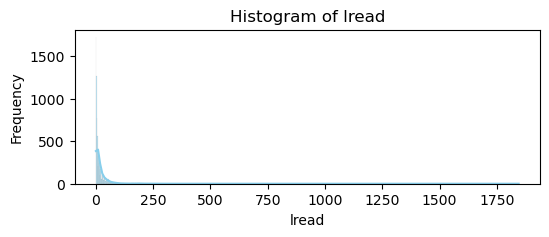

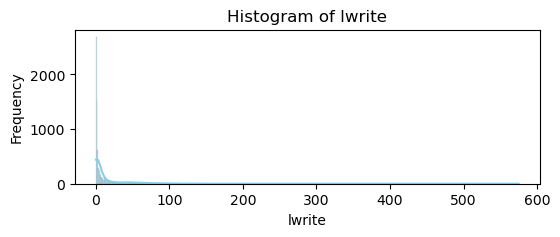

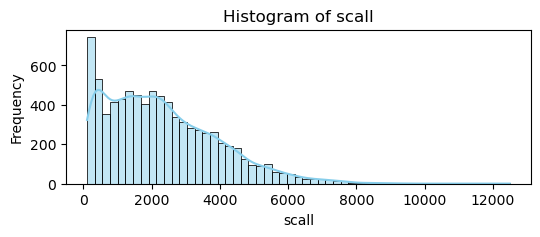

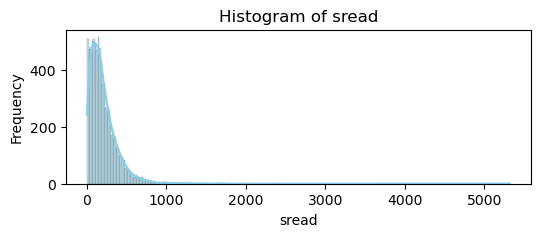

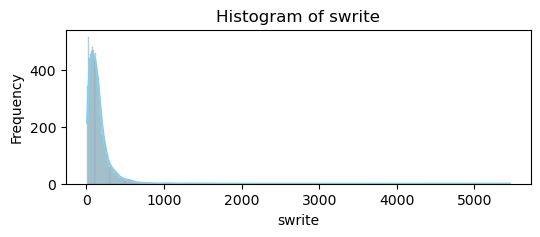

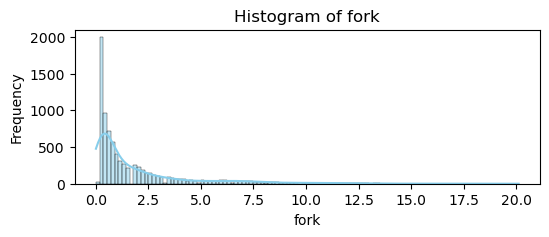

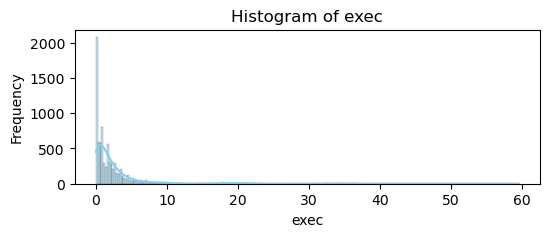

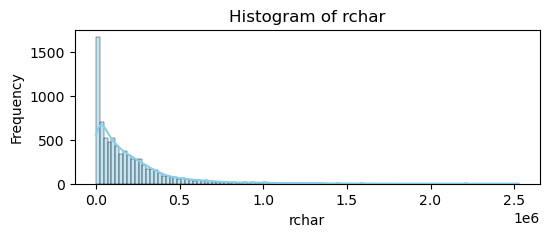

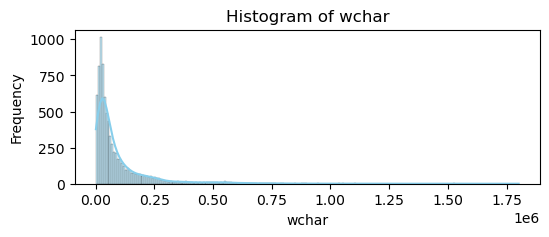

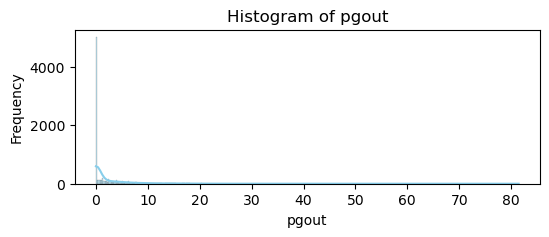

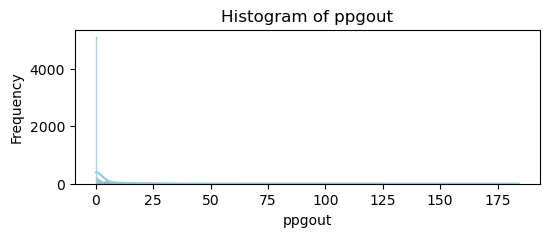

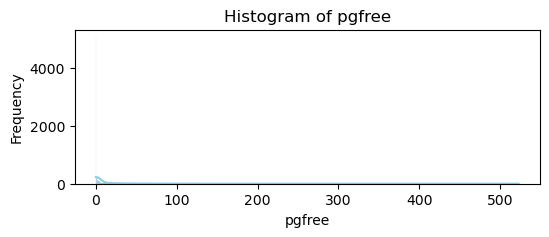

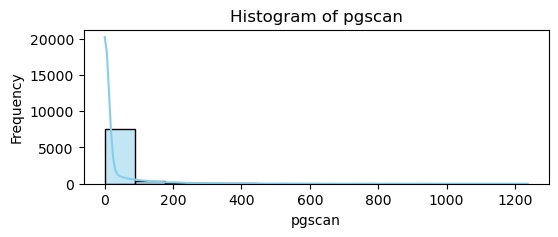

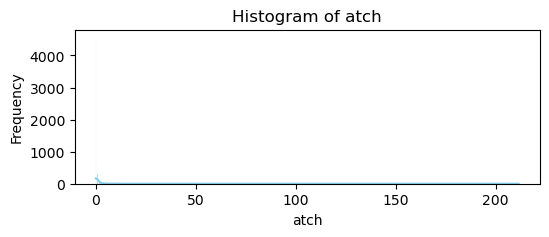

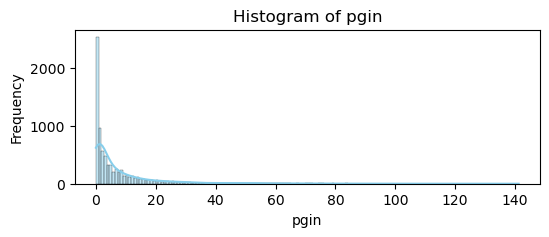

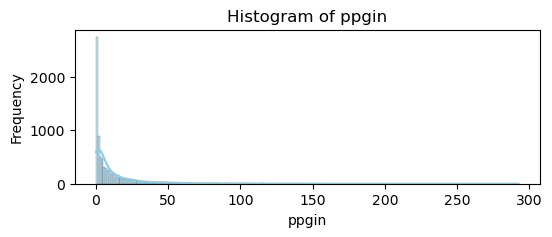

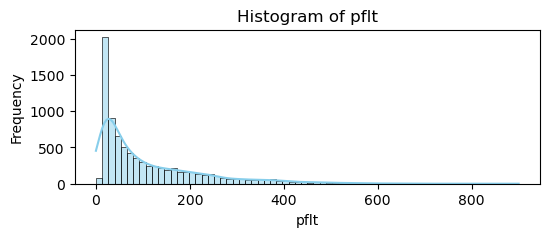

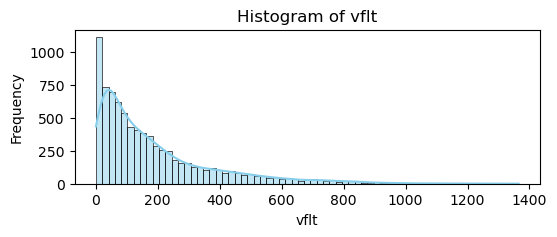

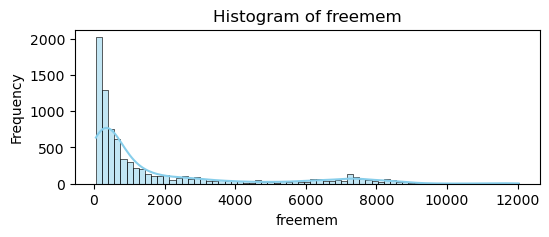

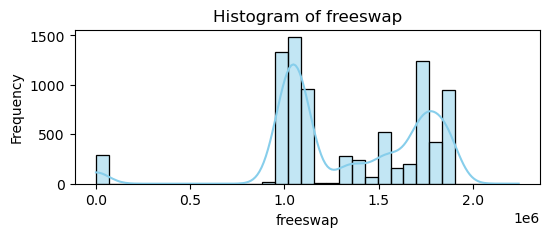

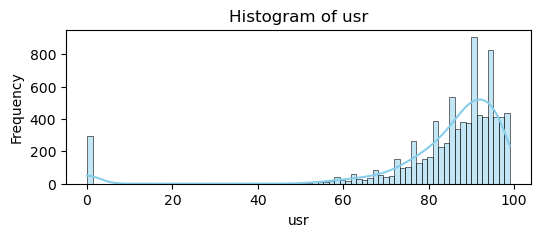

In [ ]:
# Defining  the numeric columns:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Plotting the histograms for each numerical variable:
for col in numeric_columns:
    plt.figure(figsize=(6, 2))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

##  Multivariate analysis:

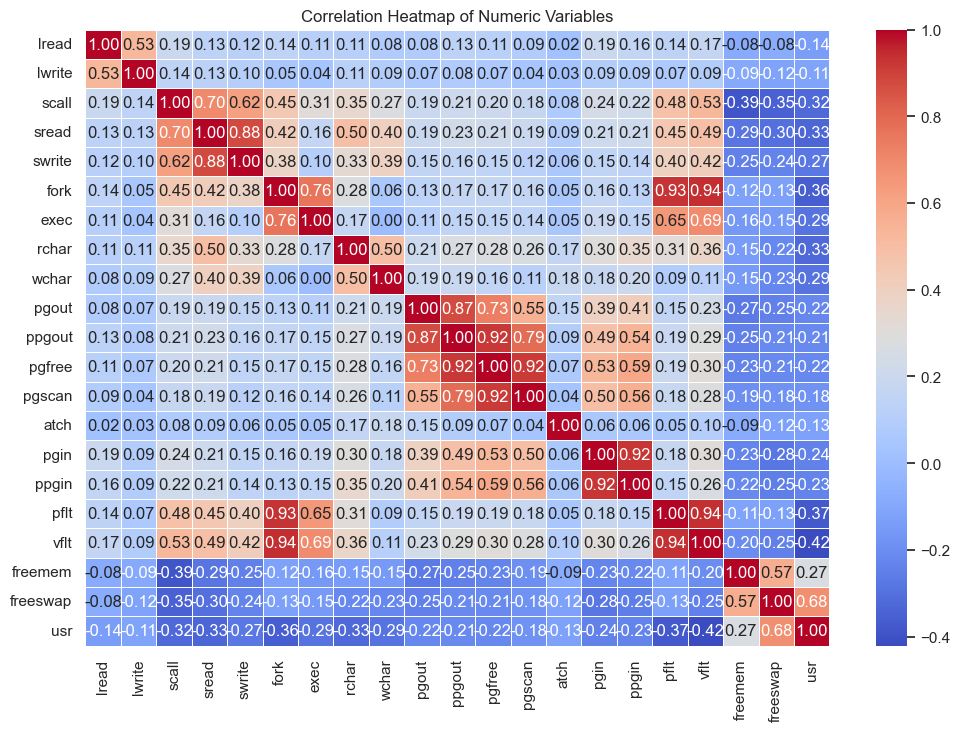

In [ ]:
# Correlation heatmap
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()

### Use appropriate visualizations to identify the patterns and insights:

C:\Users\sakth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


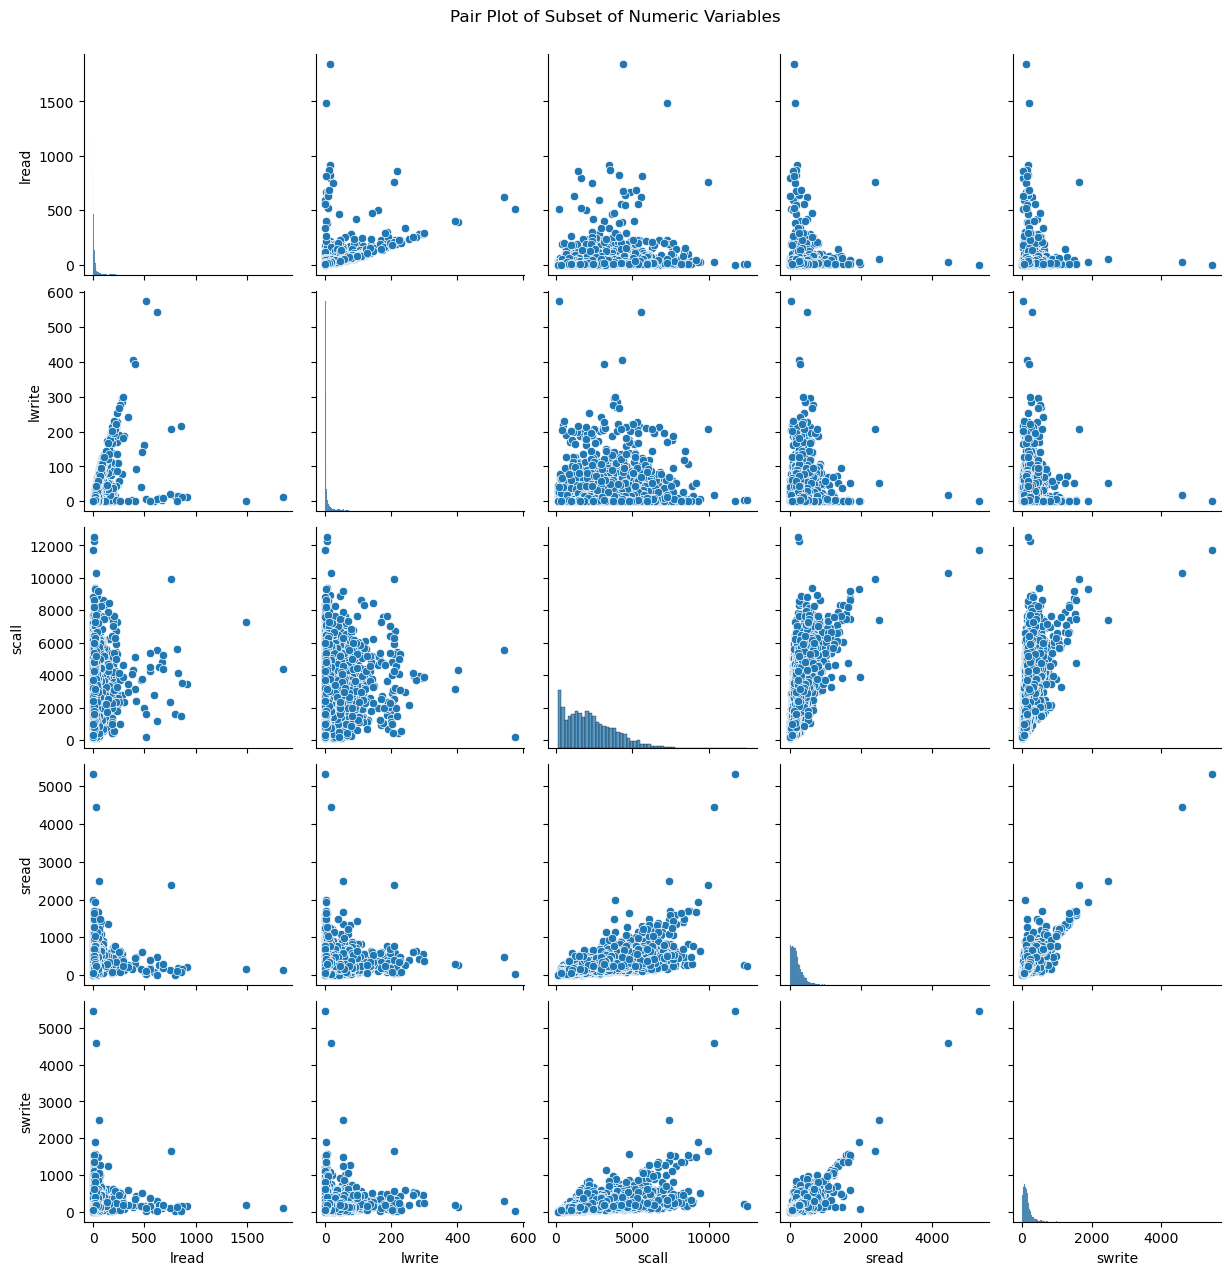

In [ ]:
subset_numeric_columns1 = numeric_columns[:5]

sns.pairplot(df[subset_numeric_columns1])
plt.suptitle("Pair Plot of Subset of Numeric Variables", y=1.02)
plt.show()

C:\Users\sakth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


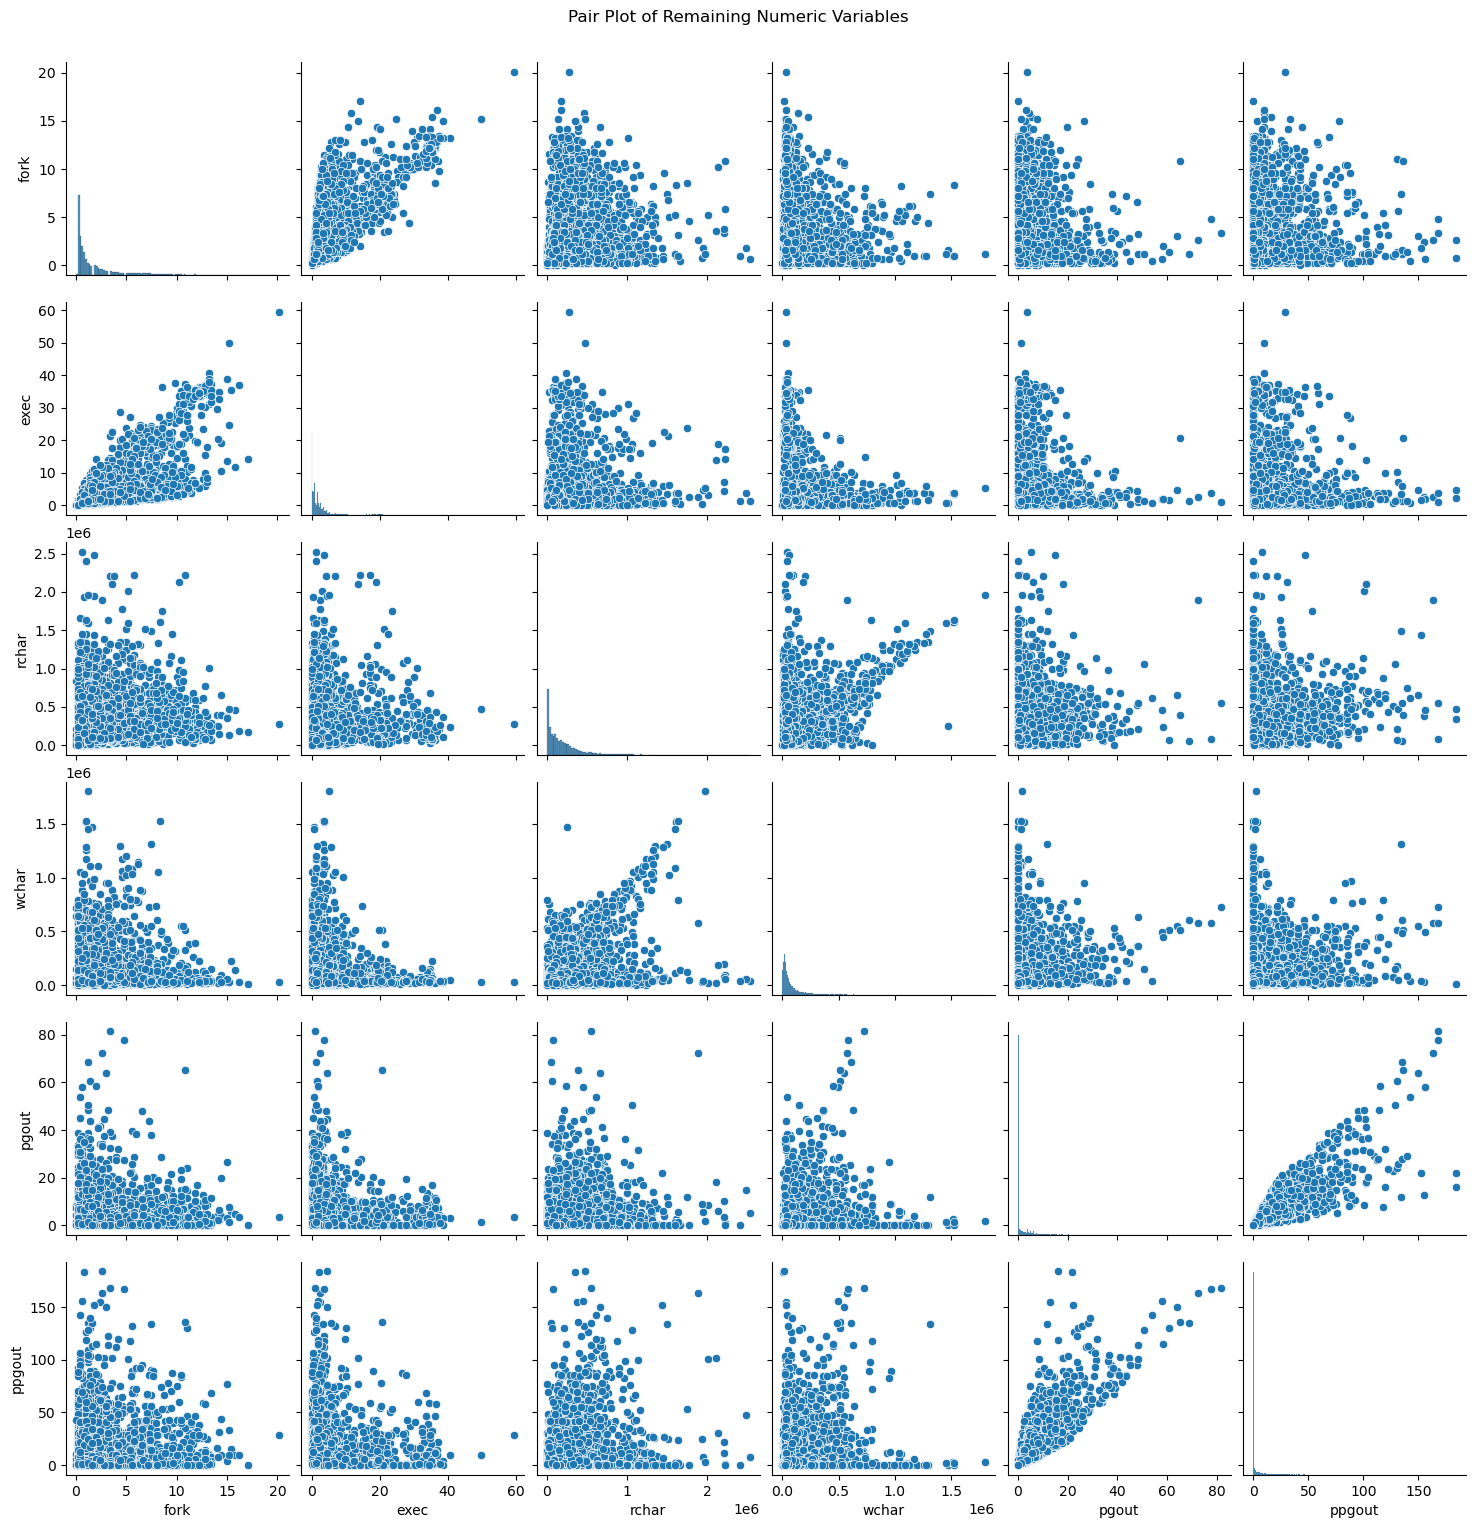

In [ ]:
subset_numeric_columns2 = numeric_columns[5:11]

sns.pairplot(df[subset_numeric_columns2])
plt.suptitle("Pair Plot of Remaining Numeric Variables", y=1.02)
plt.show()

C:\Users\sakth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


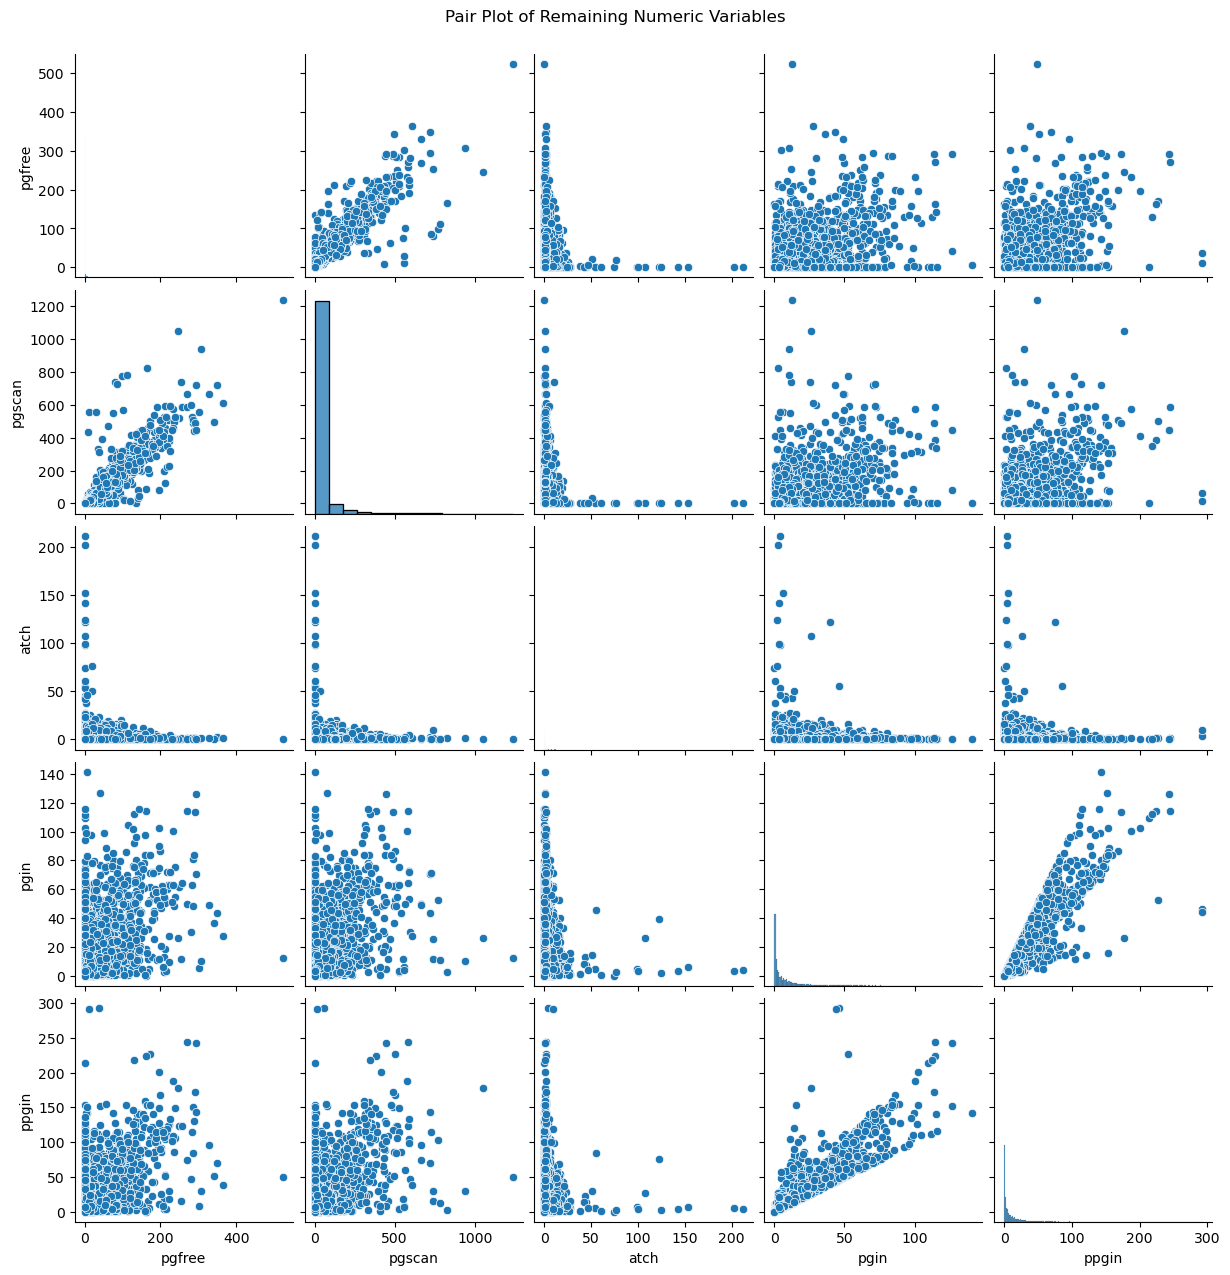

In [ ]:
subset_numeric_columns3 = numeric_columns[11:16]

sns.pairplot(df[subset_numeric_columns3])
plt.suptitle("Pair Plot of Remaining Numeric Variables", y=1.02)
plt.show()

C:\Users\sakth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


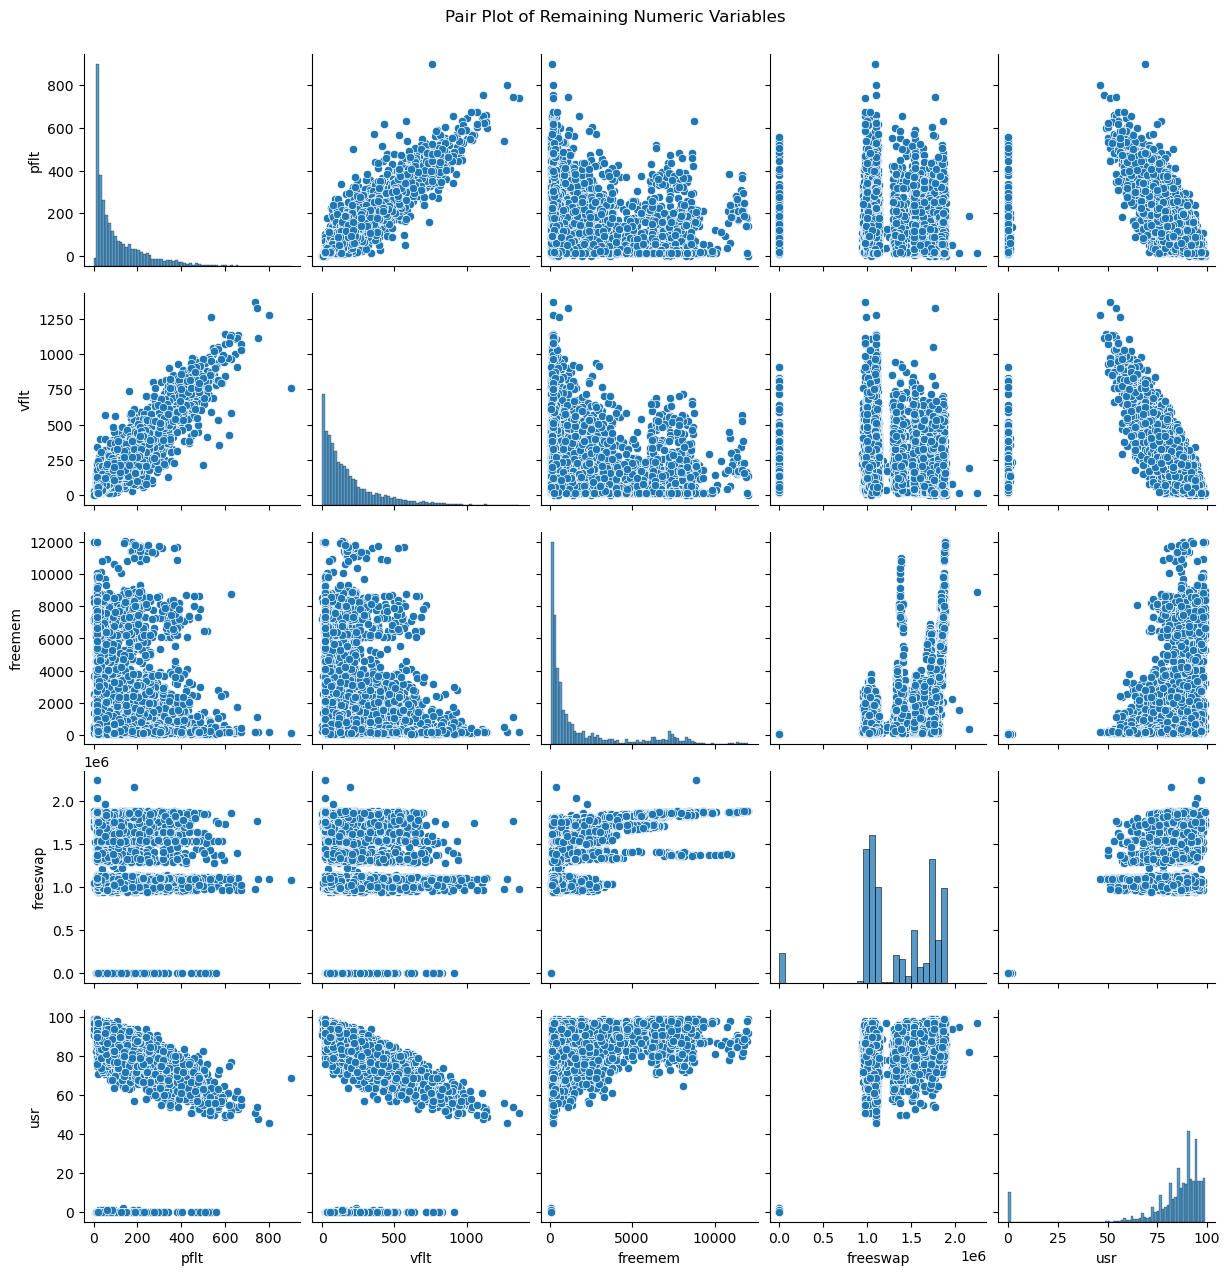

In [ ]:
subset_numeric_columns4 = numeric_columns[16:]

sns.pairplot(df[subset_numeric_columns4])
plt.suptitle("Pair Plot of Remaining Numeric Variables", y=1.02)
plt.show()

## Patterns and Insights:

* From the pairplots we can see where more data points falling between the variabe.
* From the pairplot we can see some outliers, which means that some of the variables have extreme values.
* The accumulation of data points in a particular region suggests that there is a higher concentration of observations with   similar values for those variables.
* Some of the variables the x variable increases, the y variable tends to increase as well. This positive relationship indicates that there may be a direct influence or association between the two variables.
* A positive correlation between "fork" and "exec"  imply that an increase in the number of fork calls (creating a new process) leads to a corresponding increase in the number of exec calls (executing a new program). This pattern might indicate a relationship where more processes being created result in more programs being executed concurrently.
* A negative correlation between "usr" and "pflt" imply that as the percentage of time CPUs run in user mode increases, the number of page faults caused by protection errors decreases. This pattern might indicate that when the CPUs are more engaged in user mode tasks, there are fewer protection error-related page faults occurring in the system.

## Key meaningful observations on individual variables and the relationship between variables:

### Observation on Individual variables:

#### Iread:
* A straight line in a histogram suggests that a significant number of data points have the same value.It indicates that there is a cluster of data points with a value of approximately 0 on the x-axis (0 reads) and a value between 1000 and 1500 on the y-axis (500-1000 occurrences). This suggests that there are many instances where there are no reads (value of 0) and that this occurs frequently, leading to a straight line in the histogram.The small lines between 0 and 50 on the x-axis likely represent individual data points or small clusters of data points that have read values in that range. These lines suggest that there are some occurrences of read operations happening at a low frequency, compared to the larger cluster of data points at 0 reads.

#### Iwrite:
* The straight line extending from 0 to 2000 on the y-axis suggests that there is a significant concentration of write operations occurring at a frequency between 0 and 2000 writes. This indicates that the majority of data points fall within this range, with a consistent frequency of write operations.The small lines between 0 and 100 on the x-axis likely represent individual data points or small clusters of data points with write values in that range. These lines suggest that there are some occurrences of write operations happening at a low frequency, compared to the larger cluster of data points at higher write frequencies.Overall, this observation indicates that there is a wide range of write operation frequencies, with a dominant concentration around the lower end of the spectrum (0 to 2000 writes).

#### scall:
* A right-skewed histogram indicates that the majority of the data points are concentrated on the left side of the distribution.The peak value being above 600 suggests that there is a significant concentration of system call activity occurring at a frequency greater than 600 calls per second. This indicates that the system experiences periods of high demand for system calls, potentially indicating heavy utilization or specific patterns of usage.

#### sread& swrite:
* A histogram with peak values above 400 for both "sread" and "swrite" suggests that there is a significant concentration of activity at higher frequencies.For "sread," this indicates a high rate of system read calls per second, while for "swrite," it suggests a high rate of system write calls per second. These high frequencies may indicate heavy usage or specific patterns of activity related to reading from and writing to the system.

#### fork:
* A right-skewed histogram with a peak value around 2000,suggests that there is a concentration of activity at lower frequencies.The "fork" system call creates a new process by duplicating the existing process. A higher frequency of "fork" calls per second may indicate a high level of process creation activity on the system. This could be due to various factors such as multitasking, concurrent processing, or frequent spawning of new tasks or processes by applications.

#### exec:
* A right-skewed histogram for the "exec" system call, with a peak value above 2000.The "exec" system call is responsible for executing a new program within an existing process. A higher frequency of "exec" calls per second may suggest frequent program execution or process creation activities on the system. This could be due to various factors such as frequent launching of applications, script executions, or dynamic loading of libraries.

#### usr:
* A left-skewed histogram for the "usr" variable, with a peak value above 800, indicates that there is a concentration of data points at higher values of the percentage of time CPUs spend in user mode, with a tail extending towards lower values.The "usr" variable represents the portion of time (%) that CPUs run in user mode. A higher percentage value suggests that the CPUs are spending more time executing user-level processes and applications, rather than operating in kernel mode or performing system-level tasks.This distribution implies that the system may be predominantly utilized for user-level activities, such as running applications, user-initiated tasks, or user-intensive workloads.

## Relationship between variables:

* From the heatmap we can see most of the variables exhibiting weaker negative and negative co-relations, it suggests that as one variable increases, the other variable tends to decrease, or vice versa, but the relationship is not very strong.

* Only certain variables have positive co-relation.

* Variables such as "fork", "pflt", and "vflt" exhibit relatively stronger positive correlation in a heatmap, it implies that changes in one of these variables tend to be associated with corresponding changes in the others in a similar direction.A stronger positive correlation among these variables suggests that an increase or decrease in the number of system fork calls per second tends to be accompanied by a similar increase or decrease in the number of page faults caused by protection errors and address translation.

* Variables such as "pgout", "ppgout", "pgfree", and "pgscan" exhibit a relatively stronger positive correlation in a heatmap.A stronger positive correlation among these variables suggests that an increase or decrease in the number of page out requests per second tends to be accompanied by a similar increase or decrease in the number of pages paged out per second, pages placed on the free list, and pages checked for freeing per second.

* Variables such as "usr", "pflt", and "vflt" exhibit negative correlation in a heatmap.A negative correlation between these variables suggests that as the percentage of time CPUs run in user mode (usr) increases, the number of page faults caused by protection errors (pflt) and the number of page faults caused by address translation (vflt) tend to decrease, and vice versa.This relationship could indicate a trade-off between CPU usage in user mode and the occurrence of page faults.

# Problem 1 - Data Pre-processing

## Prepare the data for modelling:

## Missing Value Treatment:

#### Step 1: Identifying the missing values:

In [ ]:
missing_values_before = df.isnull().sum()

#### Treating the missing values(Imputation)

In [ ]:
# For numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)  # Using median for imputation
# For categorical columns:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)  # Using mode for imputation
missing_values_after = df.isnull().sum()

In [ ]:
print("Missing values before treatment:")
print(missing_values_before)

Missing values before treatment:
lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64


In [ ]:
print("\nMissing values after treatment:")
print(missing_values_after)


Missing values after treatment:
lread       0
lwrite      0
scall       0
sread       0
swrite      0
fork        0
exec        0
rchar       0
wchar       0
pgout       0
ppgout      0
pgfree      0
pgscan      0
atch        0
pgin        0
ppgin       0
pflt        0
vflt        0
runqsz      0
freemem     0
freeswap    0
usr         0
dtype: int64


## Outlier Detection:

#### Dataset before outlier Treatment:

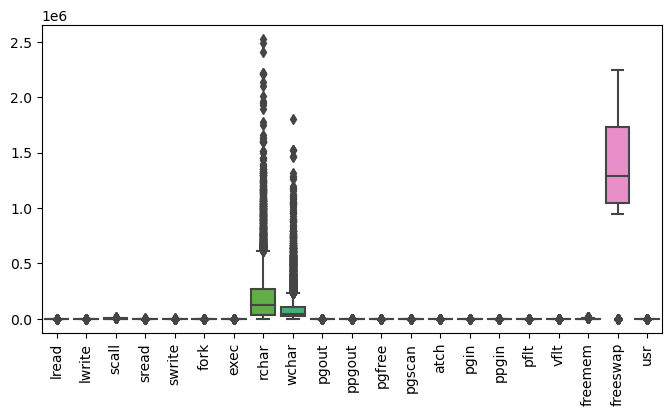

In [ ]:
# Boxplots
plt.figure(figsize=(8,4))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
print("Summary Statistics Before Outlier Treatment:")
df.describe()

Summary Statistics Before Outlier Treatment:


lread       lwrite         scall        sread       swrite  \
count  8192.000000  8192.000000   8192.000000  8192.000000  8192.000000   
mean     19.559692    13.106201   2306.318237   210.479980   150.058228   
std      53.353799    29.891726   1633.617322   198.980146   160.478980   
min       0.000000     0.000000    109.000000     6.000000     7.000000   
25%       2.000000     0.000000   1012.000000    86.000000    63.000000   
50%       7.000000     1.000000   2051.500000   166.000000   117.000000   
75%      20.000000    10.000000   3317.250000   279.000000   185.000000   
max    1845.000000   575.000000  12493.000000  5318.000000  5456.000000   

              fork         exec         rchar         wchar        pgout  ...  \
count  8192.000000  8192.000000  8.192000e+03  8.192000e+03  8192.000000  ...   
mean      1.884554     2.791998  1.964728e+05  9.581275e+04     2.285317  ...   
std       2.479493     5.212456  2.384460e+05  1.407285e+05     5.307038  ...   
min       0.000000     0.000000  2.780000e+02  1.498000e+03     0.000000  ...   
25%       0.400000     0.200000  3.486050e+04  2.297775e+04     0.000000  ...   
50%       0.800000     1.200000  1.254735e+05  4.661900e+04     0.000000  ...   
75%       2.200000     2.800000  2.653948e+05  1.060370e+05     2.400000  ...   
max      20.120000    59.560000  2.526649e+06  1.801623e+06    81.440000  ...   

            pgfree       pgscan         atch         pgin        ppgin  \
count  8192.000000  8192.000000  8192.000000  8192.000000  8192.000000   
mean     11.919712    21.526849     1.127505     8.277960    12.388586   
std      32.363520    71.141340     5.708347    13.874978    22.281318   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.600000     0.600000   
50%       0.000000     0.000000     0.000000     2.800000     3.800000   
75%       5.000000     0.000000     0.600000     9.765000    13.800000   
max     523.000000  1237.000000   211.580000   141.200000   292.610000   

              pflt         vflt       freemem      freeswap          usr  
count  8192.000000  8192.000000   8192.000000  8.192000e+03  8192.000000  
mean    109.793799   185.315796   1763.456299  1.328126e+06    83.968872  
std     114.419221   191.000603   2482.104511  4.220194e+05    18.401905  
min       0.000000     0.200000     55.000000  2.000000e+00     0.000000  
25%      25.000000    45.400000    231.000000  1.042624e+06    81.000000  
50%      63.800000   120.400000    579.000000  1.289290e+06    89.000000  
75%     159.600000   251.800000   2002.250000  1.730380e+06    94.000000  
max     899.800000  1365.000000  12027.000000  2.243187e+06    99.000000  

[8 rows x 21 columns]

#### Treating outliers:

In [ ]:
from scipy import stats
# Convert object type columns to numeric
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Now, try detecting and treating outliers again
z_scores = np.abs(stats.zscore(df.dropna()))  # Drop rows with missing values first
threshold = 3
outliers = np.where(z_scores > threshold)
df_cleaned = df[(z_scores < threshold).all(axis=1)]

#### After outlier treatment:

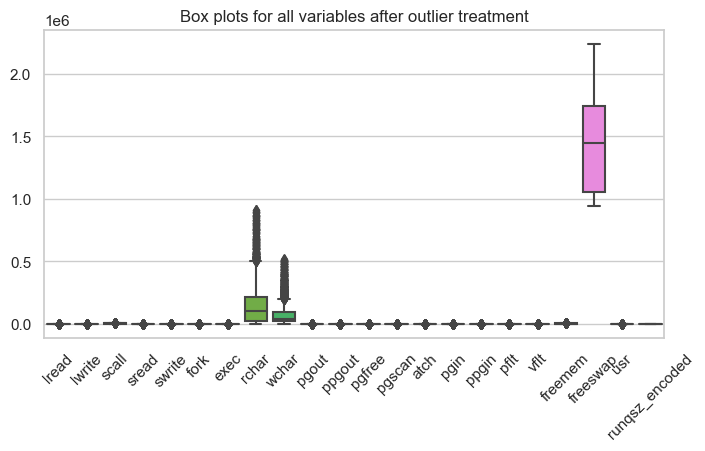

In [ ]:
sns.set(style="whitegrid")


plt.figure(figsize=(8,4))
sns.boxplot(df_cleaned)
plt.xticks(rotation=45)
plt.title('Box plots for all variables after outlier treatment')
plt.show()

In [ ]:
print("Summary Statistics After Outlier Treatment:")
df_cleaned.describe()

Summary Statistics After Outlier Treatment:


lread       lwrite        scall        sread       swrite  \
count  6568.000000  6568.000000  6568.000000  6568.000000  6568.000000   
mean     12.135049     9.716048  2071.753806   175.514007   127.247412   
std      17.601857    18.808507  1483.842583   134.570976    99.560108   
min       0.000000     0.000000   109.000000     6.000000     7.000000   
25%       1.000000     0.000000   849.000000    74.000000    55.000000   
50%       5.000000     1.000000  1837.500000   146.000000   104.500000   
75%      15.000000     8.000000  2991.500000   243.000000   167.000000   
max     175.000000   102.000000  7188.000000   807.000000   630.000000   

              fork         exec          rchar          wchar        pgout  \
count  6568.000000  6568.000000    6568.000000    6568.000000  6568.000000   
mean      1.408203     1.776188  145448.534181   72950.230055     1.383516   
std       1.709941     2.474992  151751.434529   82986.127931     2.960286   
min       0.000000     0.000000     278.000000    1498.000000     0.000000   
25%       0.200000     0.200000   25111.250000   20904.250000     0.000000   
50%       0.600000     0.800000  101649.000000   41424.500000     0.000000   
75%       1.800000     2.200000  215545.750000   91809.000000     1.200000   
max       9.200000    18.400000  910220.000000  517416.000000    18.160000   

       ...       pgscan         atch         pgin        ppgin         pflt  \
count  ...  6568.000000  6568.000000  6568.000000  6568.000000  6568.000000   
mean   ...     8.764289     0.677282     5.347902     7.675801    89.501223   
std    ...    28.909790     1.834918     7.968740    11.722063    89.316966   
min    ...     0.000000     0.000000     0.000000     0.000000     0.000000   
25%    ...     0.000000     0.000000     0.400000     0.400000    20.630000   
50%    ...     0.000000     0.000000     2.000000     2.600000    53.200000   
75%    ...     0.000000     0.400000     7.000000     9.800000   129.850000   
max    ...   234.600000    17.800000    49.800000    74.250000   451.800000   

              vflt      freemem      freeswap          usr  runqsz_encoded  
count  6568.000000  6568.000000  6.568000e+03  6568.000000     6568.000000  
mean    145.217599  1936.475030  1.410122e+06    89.274970        0.556486  
std     142.019611  2459.393953  3.437478e+05     6.707505        0.496837  
min       0.200000    99.000000  9.426000e+05    58.000000        0.000000  
25%      37.400000   295.000000  1.058870e+06    85.000000        0.000000  
50%      96.700000   706.000000  1.445354e+06    91.000000        1.000000  
75%     203.402500  2494.000000  1.747389e+06    94.000000        1.000000  
max     757.400000  9203.000000  2.243187e+06    99.000000        1.000000  

[8 rows x 22 columns]

## **Feature Engineering**

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


numeric_df = df.dropna().apply(pd.to_numeric, errors='coerce')

# Standardization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [14]:
scaled_data

array([[-0.34712498, -0.43893218, -0.0988219 , ...,  1.17398958,
         0.9565977 ,  0.60088368],
       [-0.36578436, -0.43893218, -1.30998641, ...,  2.22634748,
         1.28433897,  0.70989129],
       [-0.36578436, -0.43893218, -1.27935504, ...,  2.73638598,
         1.27286318,  0.76439509],
       ...,
       [-0.06723426, -0.27162628,  0.49481413, ..., -0.54900438,
        -0.85199017,  0.16485327],
       [ 0.23131585,  1.06682087,  1.75927723, ..., -0.65351385,
        -0.72533394, -0.05316194],
       [-0.3284656 , -0.43893218, -0.81069502, ..., -0.44449491,
         1.01729546,  0.54637988]])

## Encode the data:

In [ ]:
df.columns

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'freemem', 'freeswap', 'usr', 'runqsz_encoded'],
      dtype='object')

In [ ]:
df

lread  lwrite  scall  sread  swrite  fork  exec     rchar    wchar  \
0         1       0   2147     79      68   0.2  0.20   40671.0  53995.0   
1         0       0    170     18      21   0.2  0.20     448.0   8385.0   
2        15       3   2162    159     119   2.0  2.40  125473.5  31950.0   
3         0       0    160     12      16   0.2  0.20  125473.5   8670.0   
4         5       1    330     39      38   0.4  0.40  125473.5  12185.0   
...     ...     ...    ...    ...     ...   ...   ...       ...      ...   
8187     16      12   3009    360     244   1.6  5.81  405250.0  85282.0   
8188      4       0   1596    170     146   2.4  1.80   89489.0  41764.0   
8189     16       5   3116    289     190   0.6  0.60  325948.0  52640.0   
8190     32      45   5180    254     179   1.2  1.20   62571.0  29505.0   
8191      2       0    985     55      46   1.6  4.80  111111.0  22256.0   

      pgout  ...  pgscan  atch   pgin  ppgin    pflt    vflt  freemem  \
0      0.00  ...    0.00   0.0   1.60   2.60   16.00   26.40     4670   
1      0.00  ...    0.00   0.0   0.00   0.00   15.63   16.83     7278   
2      0.00  ...    0.00   1.2   6.00   9.40  150.20  220.20      702   
3      0.00  ...    0.00   0.0   0.20   0.20   15.60   16.80     7248   
4      0.00  ...    0.00   0.0   1.00   1.20   37.80   47.60      633   
...     ...  ...     ...   ...    ...    ...     ...     ...      ...   
8187   8.02  ...   55.11   0.6  35.87  47.90  139.28  270.74      387   
8188   3.80  ...    0.20   0.8   3.80   4.40  122.40  212.60      263   
8189   0.40  ...    0.00   0.4  28.40  45.20   60.20  219.80      400   
8190   1.40  ...   18.04   0.4  23.05  24.25   93.19  202.81      141   
8191   0.00  ...    0.00   0.2   3.40   6.20   91.80  110.00      659   

      freeswap  usr  runqsz_encoded  
0      1730946   95               0  
1      1869002   97               1  
2      1021237   87               1  
3      1863704   98               1  
4      1760253   90               1  
...        ...  ...             ...  
8187    986647   80               0  
8188   1055742   90               1  
8189    969106   87               1  
8190   1022458   83               0  
8191   1756514   94               0  

[8192 rows x 22 columns]

## Train-test split:

In [ ]:
from sklearn.model_selection import train_test_split

# Defining the features (X) and target variable (y):
X = df.drop(columns=['runqsz_encoded'])
y = df['runqsz_encoded']

# Spliting the data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X

lread  lwrite  scall  sread  swrite  fork  exec     rchar    wchar  \
0         1       0   2147     79      68   0.2  0.20   40671.0  53995.0   
1         0       0    170     18      21   0.2  0.20     448.0   8385.0   
2        15       3   2162    159     119   2.0  2.40  125473.5  31950.0   
3         0       0    160     12      16   0.2  0.20  125473.5   8670.0   
4         5       1    330     39      38   0.4  0.40  125473.5  12185.0   
...     ...     ...    ...    ...     ...   ...   ...       ...      ...   
8187     16      12   3009    360     244   1.6  5.81  405250.0  85282.0   
8188      4       0   1596    170     146   2.4  1.80   89489.0  41764.0   
8189     16       5   3116    289     190   0.6  0.60  325948.0  52640.0   
8190     32      45   5180    254     179   1.2  1.20   62571.0  29505.0   
8191      2       0    985     55      46   1.6  4.80  111111.0  22256.0   

      pgout  ...  pgfree  pgscan  atch   pgin  ppgin    pflt    vflt  freemem  \
0      0.00  ...    0.00    0.00   0.0   1.60   2.60   16.00   26.40     4670   
1      0.00  ...    0.00    0.00   0.0   0.00   0.00   15.63   16.83     7278   
2      0.00  ...    0.00    0.00   1.2   6.00   9.40  150.20  220.20      702   
3      0.00  ...    0.00    0.00   0.0   0.20   0.20   15.60   16.80     7248   
4      0.00  ...    0.00    0.00   0.0   1.00   1.20   37.80   47.60      633   
...     ...  ...     ...     ...   ...    ...    ...     ...     ...      ...   
8187   8.02  ...   43.69   55.11   0.6  35.87  47.90  139.28  270.74      387   
8188   3.80  ...    4.80    0.20   0.8   3.80   4.40  122.40  212.60      263   
8189   0.40  ...    0.60    0.00   0.4  28.40  45.20   60.20  219.80      400   
8190   1.40  ...   13.03   18.04   0.4  23.05  24.25   93.19  202.81      141   
8191   0.00  ...    0.00    0.00   0.2   3.40   6.20   91.80  110.00      659   

      freeswap  usr  
0      1730946   95  
1      1869002   97  
2      1021237   87  
3      1863704   98  
4      1760253   90  
...        ...  ...  
8187    986647   80  
8188   1055742   90  
8189    969106   87  
8190   1022458   83  
8191   1756514   94  

[8192 rows x 21 columns]

In [ ]:
y

0       0
1       1
2       1
3       1
4       1
       ..
8187    0
8188    1
8189    1
8190    0
8191    0
Name: runqsz_encoded, Length: 8192, dtype: int32

# Problem 1- Model Building - Linear regression:

 ## Apply linear Regression using Sklearn:

 Creating the linear regression model:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a linear regression model:
model = LinearRegression()

# Fitting the model to the training data:
model.fit(X_train, y_train)

# Make predictions on the testing data:
y_pred = model.predict(X_test)

# Evaluatin the model:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.2047372154194149


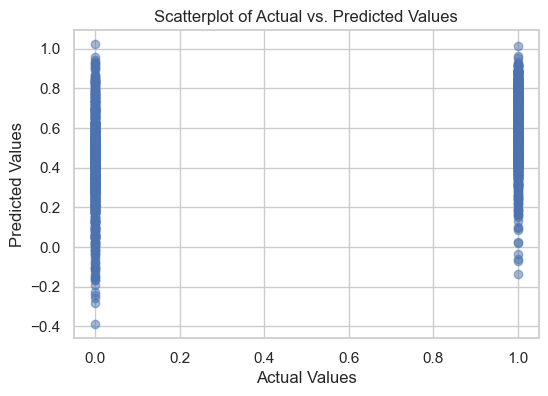

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatterplot of Actual vs. Predicted Values")
plt.show()


A mean squared error of approximately 0.2047 indicates that, on average, the squared difference between the actual and predicted values (on the test set) is around 0.2047.

## Using Statsmodels Perform checks for significant variables using the appropriate method:

In [ ]:
import statsmodels.api as sm

# Adding a constant term to the predictor variables:
X = sm.add_constant(X)

# Fitting the OLS model:
model = sm.OLS(y, X).fit()

# Getting the summary statistics:
summary = model.summary()

# Printing the summary:
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         runqsz_encoded   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     93.22
Date:                Sat, 13 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:12:26   Log-Likelihood:                -5052.4
No. Observations:                8192   AIC:                         1.015e+04
Df Residuals:                    8170   BIC:                         1.030e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1783      0.032      5.619      0.000       0.116       0.241
lread       8.885e-05      0.000      0.780      0.435      -0.000       0.000
lwrite     -5.337e-05      0.000     -0.269      0.788      -0.000       0.000
scall       -7.63e-05   4.73e-06    -16.128      0.000   -8.56e-05    -6.7e-05
sread       7.707e-05   6.53e-05      1.179      0.238    -5.1e-05       0.000
swrite         0.0002   7.18e-05      2.971      0.003    7.26e-05       0.000
fork           0.0317      0.009      3.718      0.000       0.015       0.048
exec           0.0048      0.002      2.907      0.004       0.002       0.008
rchar      -1.685e-07   2.92e-08     -5.769      0.000   -2.26e-07   -1.11e-07
wchar      -1.468e-07   4.47e-08     -3.283      0.001   -2.35e-07   -5.92e-08
pgout          0.0078      0.002      3.557      0.000       0.003       0.012
ppgout        -0.0009      0.001     -0.695      0.487      -0.003       0.002
pgfree         0.0005      0.001      0.745      0.456      -0.001       0.002
pgscan      7.033e-06      0.000      0.037      0.971      -0.000       0.000
atch          -0.0007      0.001     -0.799      0.424      -0.003       0.001
pgin          -0.0017      0.001     -1.759      0.079      -0.004       0.000
ppgin          0.0011      0.001      1.764      0.078      -0.000       0.002
pflt           0.0002      0.000      1.242      0.214      -0.000       0.000
vflt          -0.0003      0.000     -2.338      0.019      -0.000   -4.28e-05
freemem     4.891e-05   2.64e-06     18.548      0.000    4.37e-05    5.41e-05
freeswap   -5.453e-07   2.07e-08    -26.381      0.000   -5.86e-07   -5.05e-07
usr            0.0131      0.000     30.828      0.000       0.012       0.014
==============================================================================
Omnibus:                    19287.039   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              603.808
Skew:                          -0.179   Prob(JB):                    7.67e-132
Kurtosis:                       1.719   Cond. No.                     9.01e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Based on the p-values in the summary output:

* Variables with p-values less than 0.05 are typically considered statistically significant.
* Variables with p-values greater than 0.05 are not considered statistically significant.
* Variables such as scall, swrite, fork, exec, rchar, wchar, pgout, freemem, freeswap, and usr also have p-values less than 0.05, indicating that they are statistically significant.
* Variables such as lread, lwrite, sread, ppgout, pgfree, pgscan, atch, pgin, ppgin, pflt, and vflt have p-values greater than 0.05, indicating that they are not statistically significant at the 0.05 significance level.

## Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Creating Model 1: Linear Regression
model1 = LinearRegression()

# Creating Model 2: Random Forest
model2 = RandomForestRegressor(n_estimators=100, random_state=42)

# Creating Model 3: Gradient Boosting
model3 = GradientBoostingRegressor(n_estimators=100, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

#Spliting the data into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Creating multiple models and fit them on the training data
models = [model1, model2, model3]

#Fitting each model and make predictions on both training and test sets:
results = []
for model in models:
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

#Calculating performance metrics:
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)

    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

    n = len(X_train)
    p = X_train.shape[1]
    adj_train_r2 = 1 - ((1 - train_r2) * (n - 1) / (n - p - 1))
    adj_test_r2 = 1 - ((1 - test_r2) * (n - 1) / (n - p - 1))

    results.append({
        'Model': str(model),
        'Train R-squared': train_r2,
        'Test R-squared': test_r2,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Adjusted Train R-squared': adj_train_r2,
        'Adjusted Test R-squared': adj_test_r2
    })

#Comparing the performance metrics:
results_df = pd.DataFrame(results)
results_df

Model  Train R-squared  \
0                          LinearRegression()         0.196826   
1      RandomForestRegressor(random_state=42)         0.922045   
2  GradientBoostingRegressor(random_state=42)         0.502304   

   Test R-squared  Train RMSE  Test RMSE  Adjusted Train R-squared  \
0        0.175623    0.447507   0.452479                  0.194120   
1        0.427487    0.139418   0.377075                  0.921782   
2        0.410147    0.352271   0.382743                  0.500627   

   Adjusted Test R-squared  
0                 0.172845  
1                 0.425558  
2                 0.408160

# Problem 1 - Business Insights & Recommendations:

## Comment on the Linear Regression equation from the final model and impact of relevant variables (atleast 2) as per the equation:

##### The equation is runqsz_encoded=β0,+β1*Iread+ ,…,β21*usr

In the final linear regression model, the equation helps us understand how each predictor variable impacts the predicted value of the 'runqsz_encoded' variable. Here are comments on the impact of two relevant variables based on their coefficients:

#### scall (System Calls):
* With a negative coefficient, the variable 'scall' appears to have a negative impact on the 'runqsz_encoded' variable. This suggests that an increase in the number of system calls is associated with a decrease in the 'runqsz_encoded' value. This might indicate that a higher frequency of system calls is correlated with a lesser likelihood of the system being CPU-bound.

#### usr (User Time):
* The 'usr' variable has a positive coefficient, implying a positive impact on the 'runqsz_encoded' value. This suggests that higher user time is associated with a higher likelihood of the system being CPU-bound. This aligns with the intuition that when the user processes consume more CPU time, the system is more likely to be CPU-bound.

## Conclude with the key takeaways (actionable insights and recommendations) for the business:

#### Model Performance:
* The linear regression model achieved a relatively low R-squared value of 0.193, indicating that the model explains only about 19.3% of the variance in the target variable, 'runqsz_encoded'. However, this is comparable to the performance of other machine learning models such as RandomForestRegressor and GradientBoostingRegressor.

#### Significant Variables:
* Several variables in the model have significant coefficients (p < 0.05), indicating their importance in predicting the 'runqsz_encoded' variable. Notably, 'scall', 'fork', 'exec', 'rchar', 'wchar', 'pgout', 'freemem', 'freeswap', and 'usr' have significant coefficients.

#### Model Interpretation:
* The coefficients of significant variables represent the impact of each unit change in the predictor variable on the target variable, holding other variables constant. For example, a one-unit increase in 'usr' (user time) results in a 0.0131 increase in the 'runqsz_encoded' value.

#### Business Implications:
* Understanding the significant variables can help businesses focus their efforts on optimizing system performance and resource utilization. For instance, monitoring and optimizing system calls ('scall') and user time ('usr') can have a significant impact on reducing CPU-bound status and improving overall system efficiency.

#### Performance Optimization:
* Based on the model results, businesses can prioritize performance optimization strategies such as workload balancing, resource allocation, and capacity planning. By focusing on variables with significant coefficients, organizations can effectively allocate resources to critical system components and processes.

#### Continuous Monitoring:
* Implementing a continuous monitoring system for relevant system metrics can provide real-time insights into system performance and potential bottlenecks. Regular monitoring allows businesses to identify issues promptly and implement corrective measures to maintain optimal system operation.

# Problem 2 - Define the problem and perform exploratory Data Analysis:

In [ ]:
df2=pd.read_excel("Contraceptive_method_dataset.xlsx")

In [ ]:
df2

Wife_age Wife_ education Husband_education  No_of_children_born  \
0         24.0         Primary         Secondary                  3.0   
1         45.0      Uneducated         Secondary                 10.0   
2         43.0         Primary         Secondary                  7.0   
3         42.0       Secondary           Primary                  9.0   
4         36.0       Secondary         Secondary                  8.0   
...        ...             ...               ...                  ...   
1468      33.0        Tertiary          Tertiary                  NaN   
1469      33.0        Tertiary          Tertiary                  NaN   
1470      39.0       Secondary         Secondary                  NaN   
1471      33.0       Secondary         Secondary                  NaN   
1472      17.0       Secondary         Secondary                  1.0   

     Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0      Scientology           No                   2                     High   
1      Scientology           No                   3                Very High   
2      Scientology           No                   3                Very High   
3      Scientology           No                   3                     High   
4      Scientology           No                   3                      Low   
...            ...          ...                 ...                      ...   
1468   Scientology          Yes                   2                Very High   
1469   Scientology           No                   1                Very High   
1470   Scientology          Yes                   1                Very High   
1471   Scientology          Yes                   2                      Low   
1472   Scientology           No                   2                Very High   

     Media_exposure  Contraceptive_method_used  
0            Exposed                        No  
1            Exposed                        No  
2            Exposed                        No  
3            Exposed                        No  
4            Exposed                        No  
...              ...                       ...  
1468         Exposed                       Yes  
1469         Exposed                       Yes  
1470         Exposed                       Yes  
1471         Exposed                       Yes  
1472         Exposed                       Yes  

[1473 rows x 10 columns]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


## Problem definition:

The objective of this project is to develop a predictive model that accurately predicts whether married females in the Republic of Indonesia opt for a contraceptive method based on their demographic and socio-economic attributes.

Given a dataset containing information from a Contraceptive Prevalence Survey, the model will analyze features such as the wife's age, education levels of both the wife and husband, number of children ever born, religious affiliation, employment status of the wife, husband's occupation, standard-of-living index, and media exposure. Using this information, the model will classify each individual as either using a contraceptive method or not.

## Check shape, Data types, statistical summary:

#### Shape of the Dataset:

In [ ]:
print("Shape of the dataset:")
df2.shape

Shape of the dataset:


(1473, 10)

* The dataset consists of 1473 rows and 10 columns

#### Data type:

In [ ]:
print("Data types of each column:")
df2.dtypes

Data types of each column:


Wife_age                     float64
Wife_ education               object
Husband_education             object
No_of_children_born          float64
Wife_religion                 object
Wife_Working                  object
Husband_Occupation             int64
Standard_of_living_index      object
Media_exposure                object
Contraceptive_method_used     object
dtype: object

#### Statistical summary:

In [ ]:
print("Statistical summary of numerical columns:")
df2.describe()

Statistical summary of numerical columns:


Wife_age  No_of_children_born  Husband_Occupation
count  1402.000000          1452.000000         1473.000000
mean     32.606277             3.254132            2.137814
std       8.274927             2.365212            0.864857
min      16.000000             0.000000            1.000000
25%      26.000000             1.000000            1.000000
50%      32.000000             3.000000            2.000000
75%      39.000000             4.000000            3.000000
max      49.000000            16.000000            4.000000

## Univariate analysis:

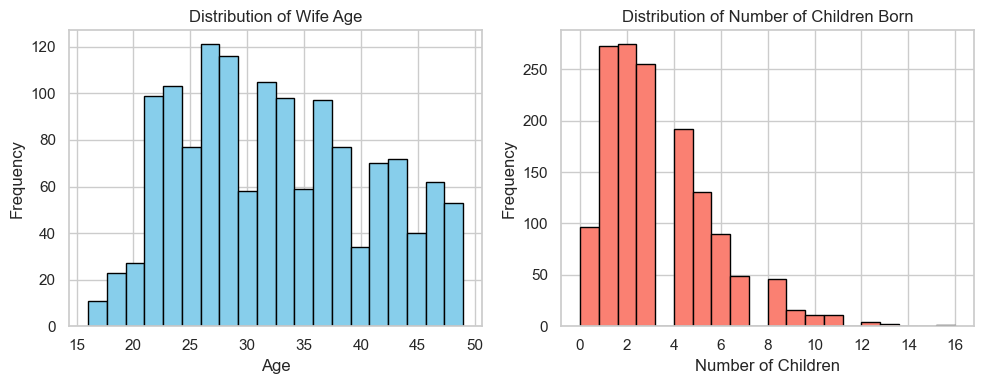

In [ ]:
# Univariate Analysis for Numerical Variables:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(df2['Wife_age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Wife Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df2['No_of_children_born'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Number of Children Born')
plt.xlabel('Number of Children')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

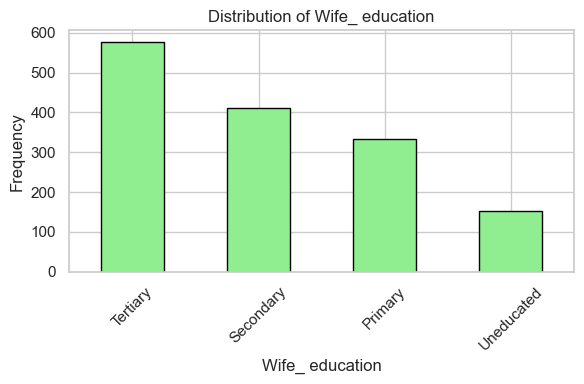

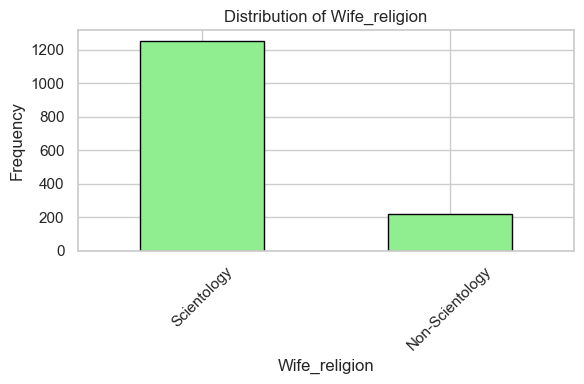

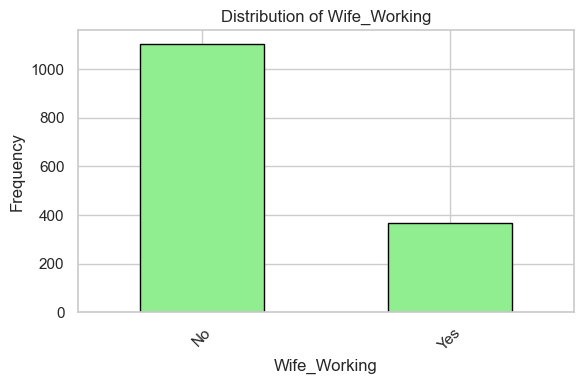

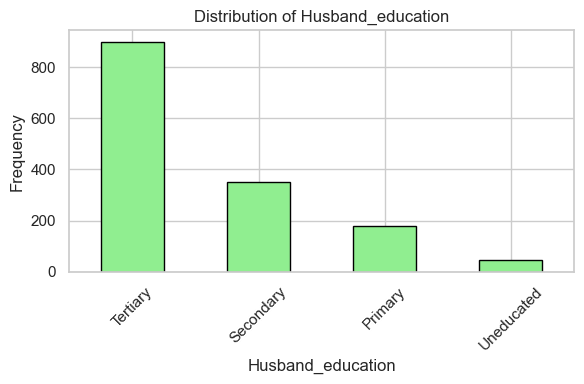

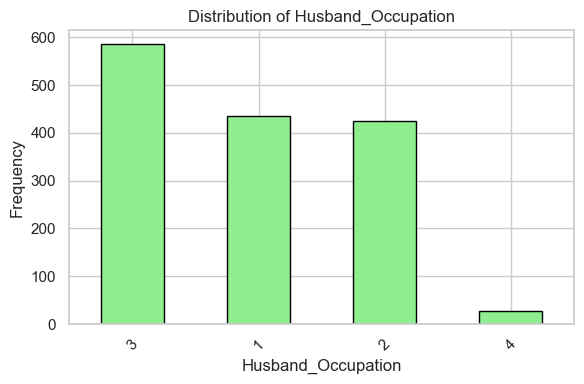

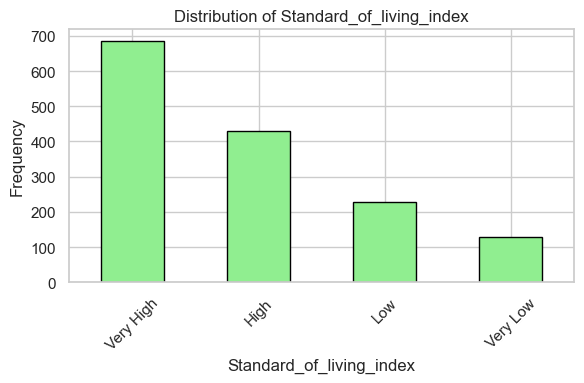

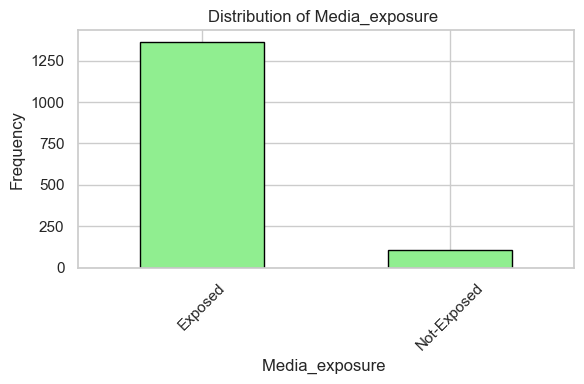

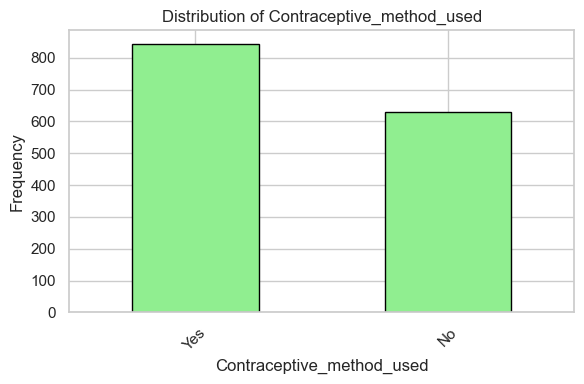

In [ ]:
# Univariate Analysis for Categorical Variables:
categorical_columns = ['Wife_ education', 'Wife_religion', 'Wife_Working',
                       'Husband_education', 'Husband_Occupation',
                       'Standard_of_living_index','Media_exposure ',
                       'Contraceptive_method_used']

for column in categorical_columns:
    plt.figure(figsize=(6, 4))
    df2[column].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## Multivariate analysis:

C:\Users\sakth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


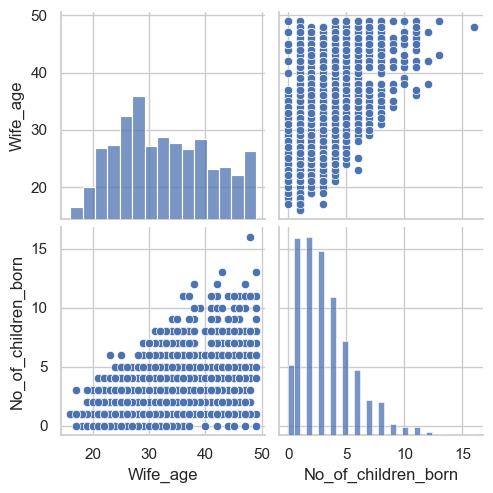

In [ ]:
# Multivariate Analysis for Numerical Variables:
sns.pairplot(df2[['Wife_age', 'No_of_children_born']])
plt.show()

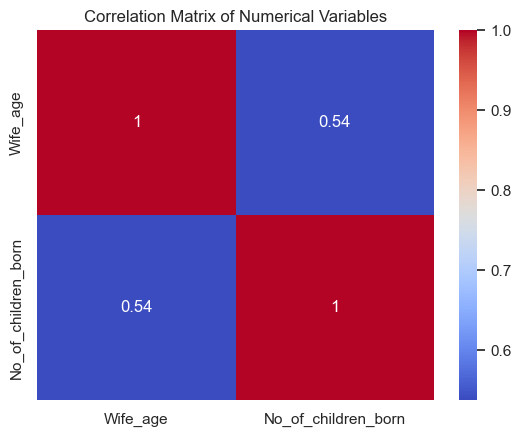

In [ ]:
# Correlation Matrix
correlation_matrix = df2[['Wife_age', 'No_of_children_born']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

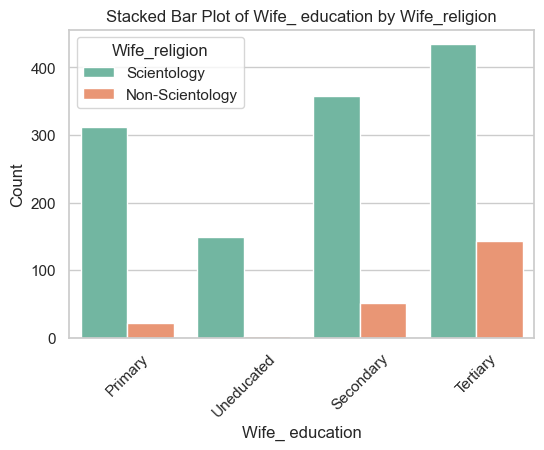

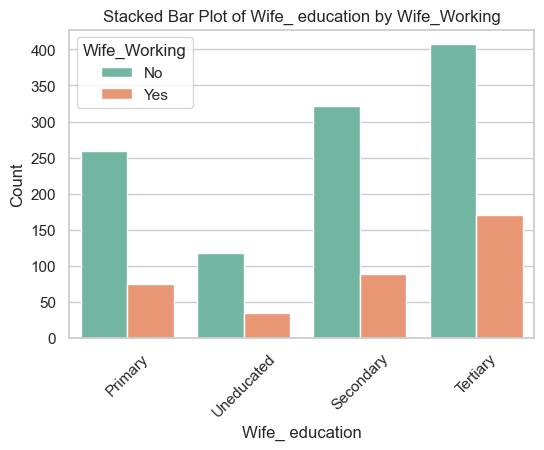

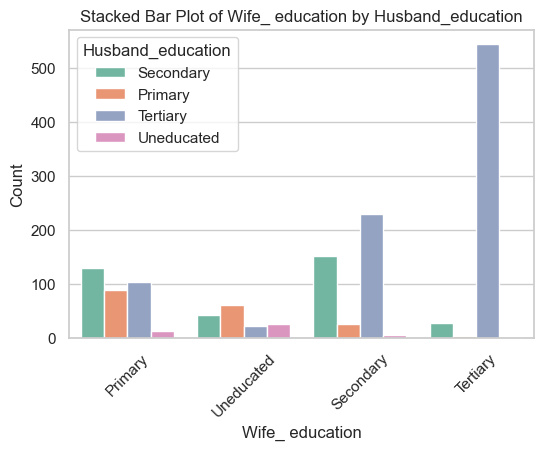

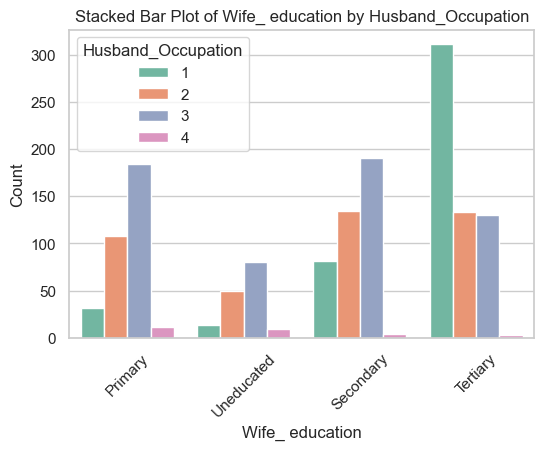

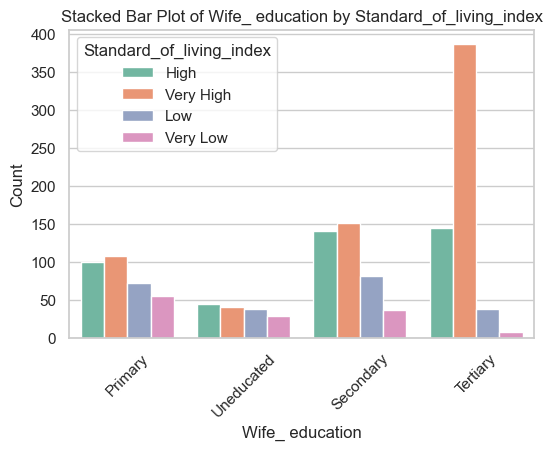

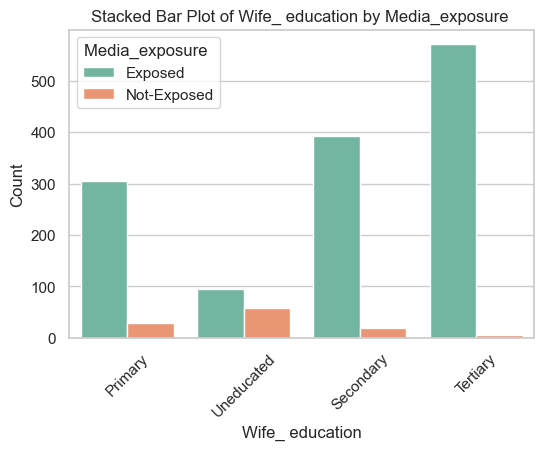

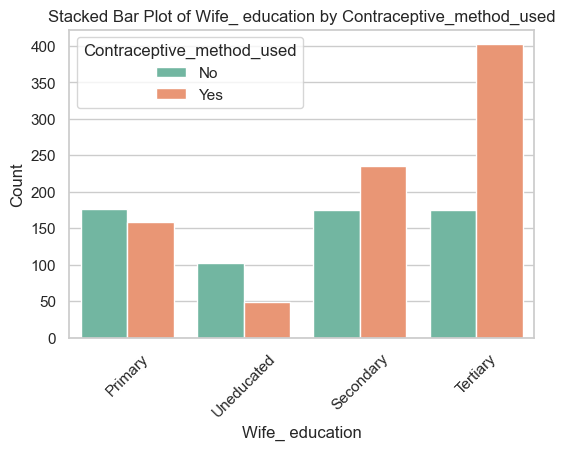

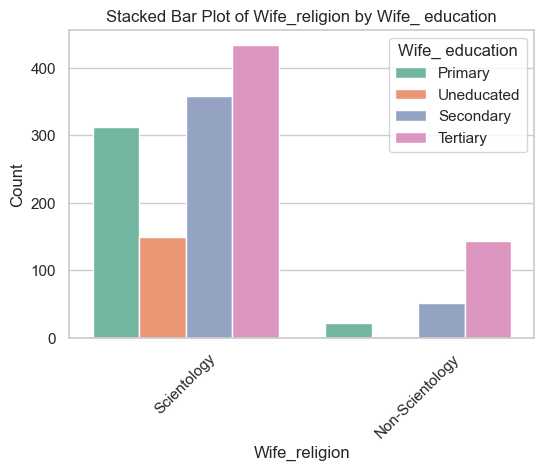

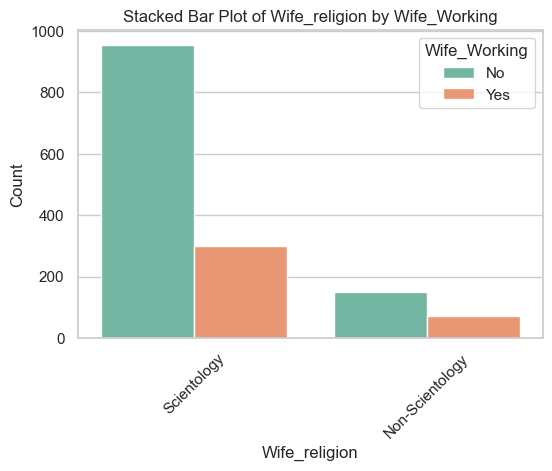

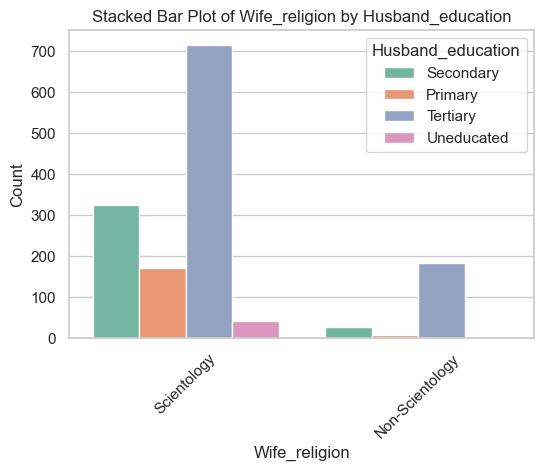

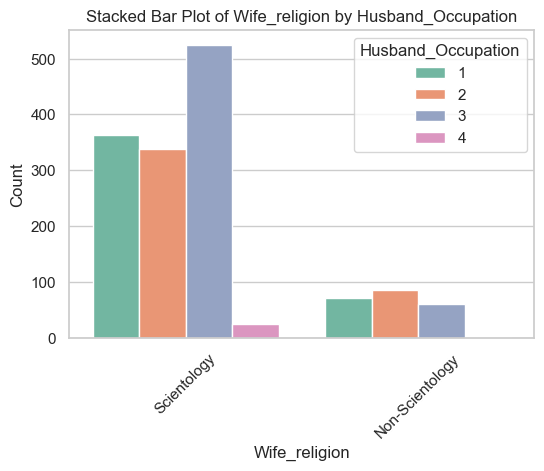

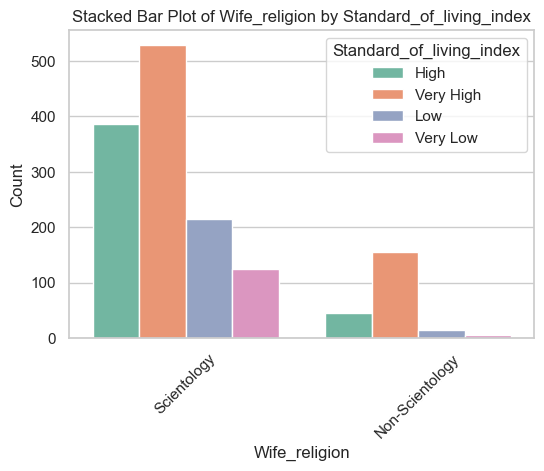

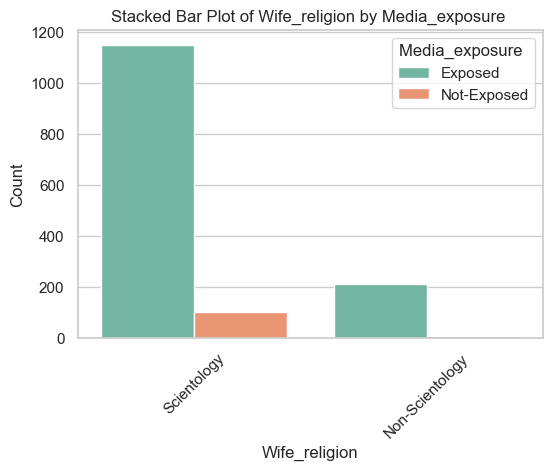

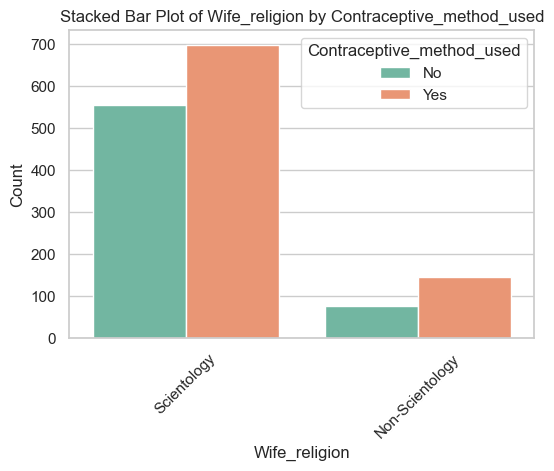

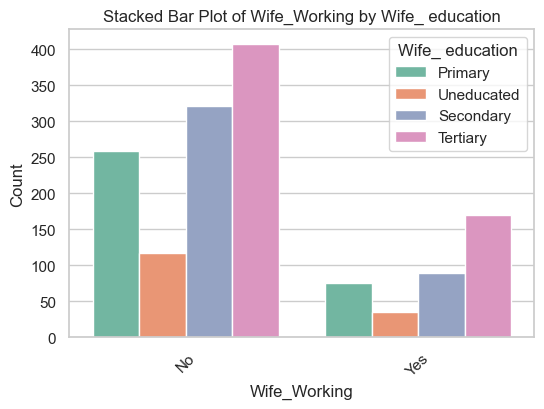

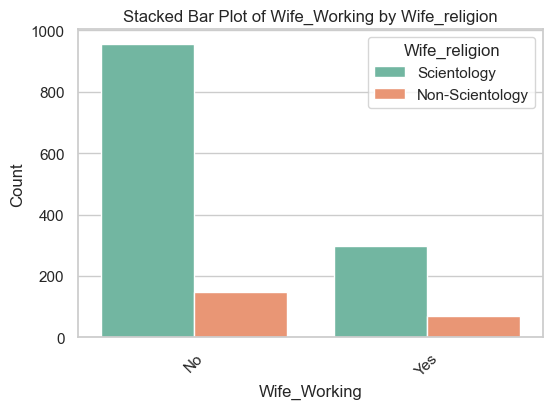

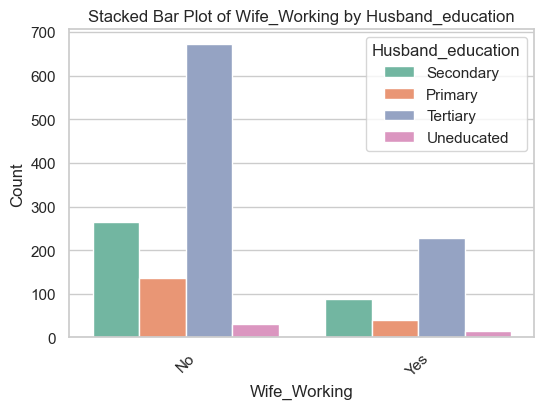

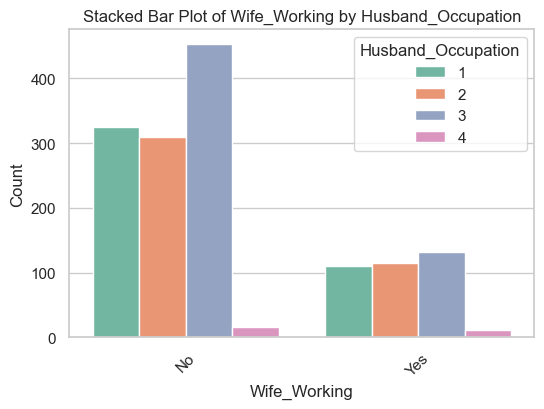

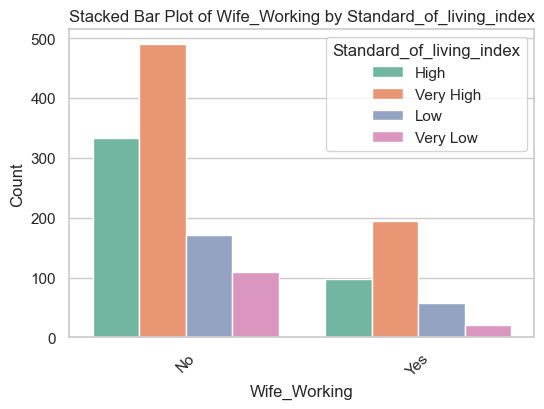

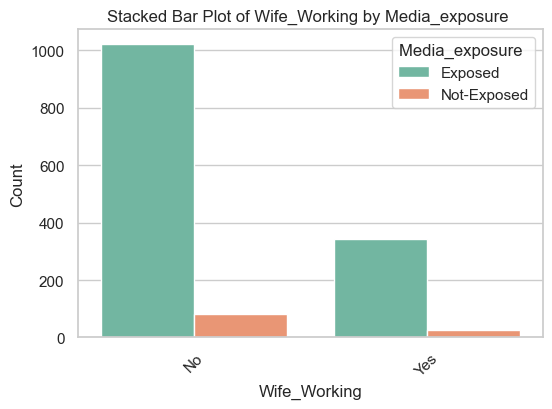

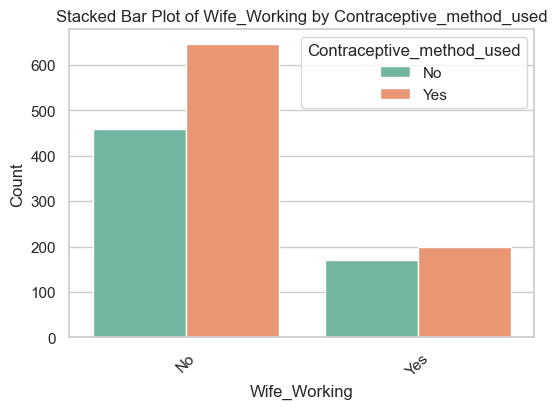

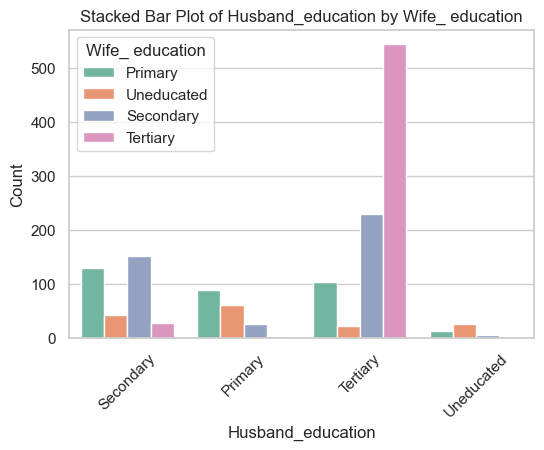

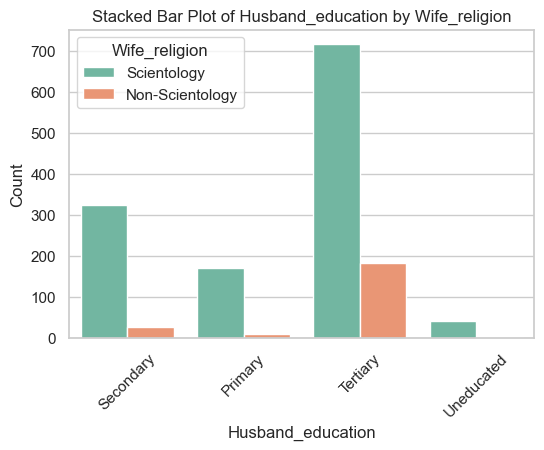

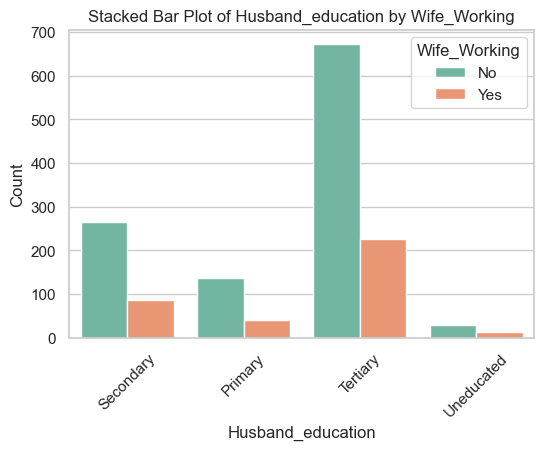

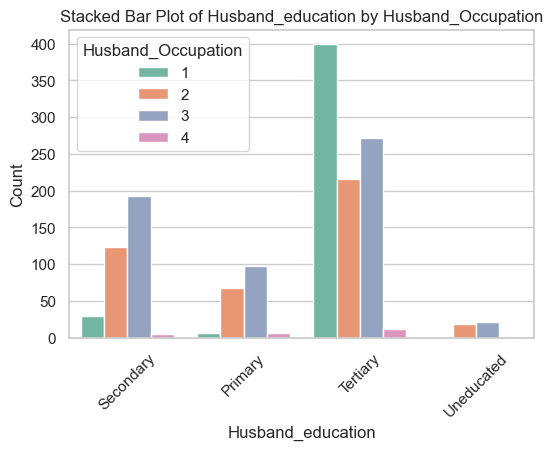

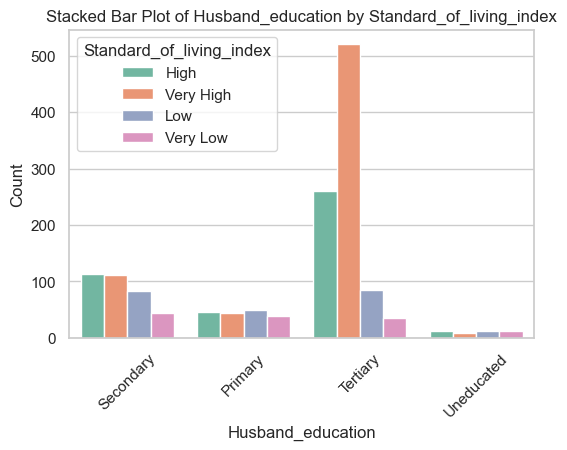

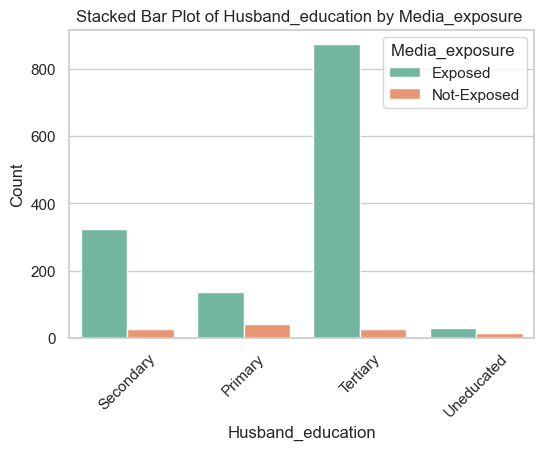

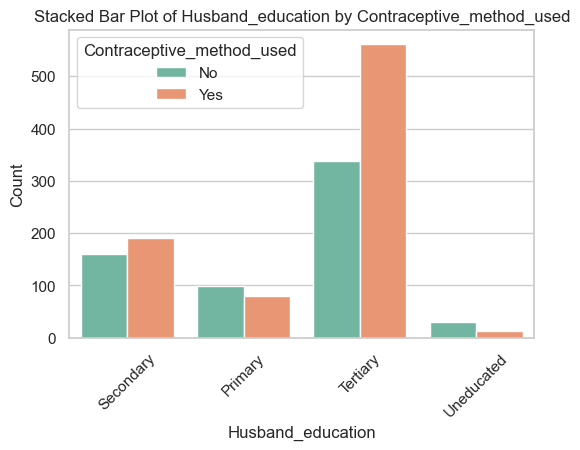

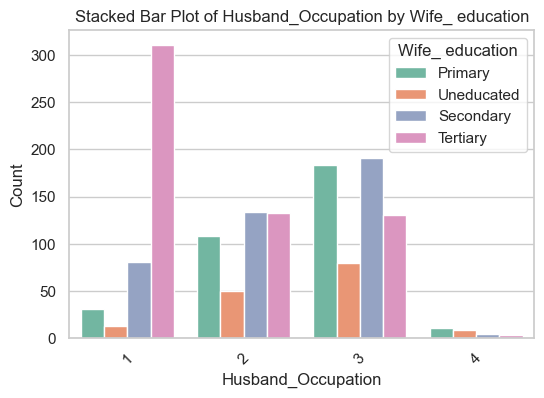

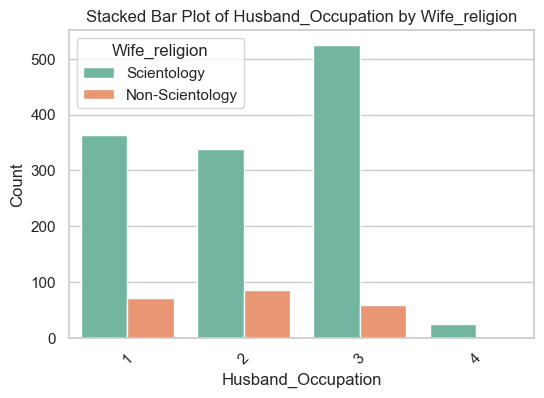

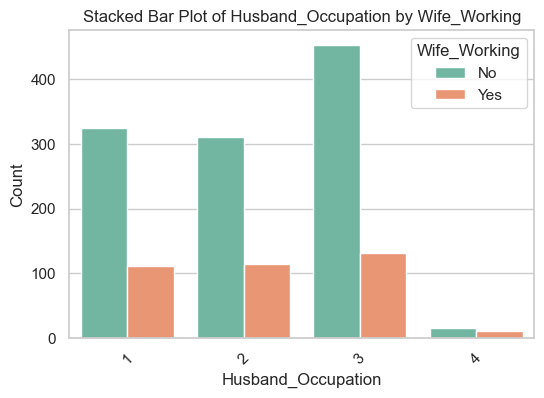

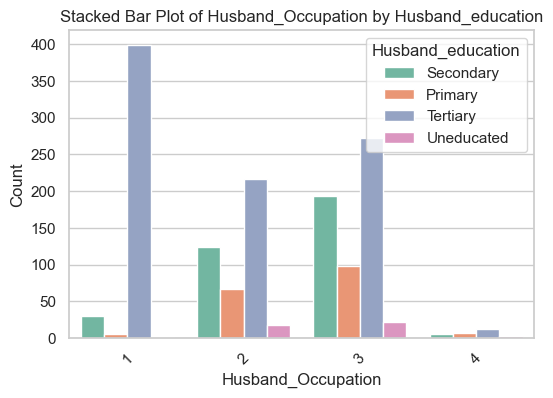

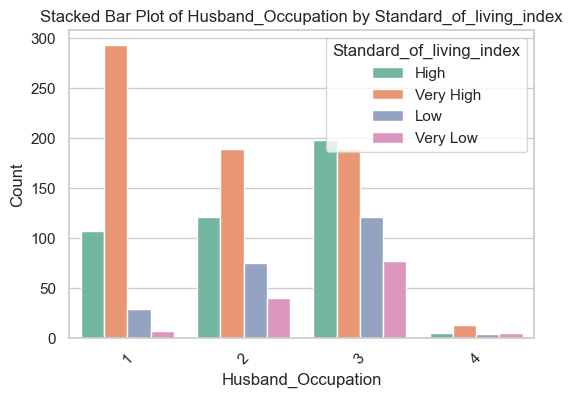

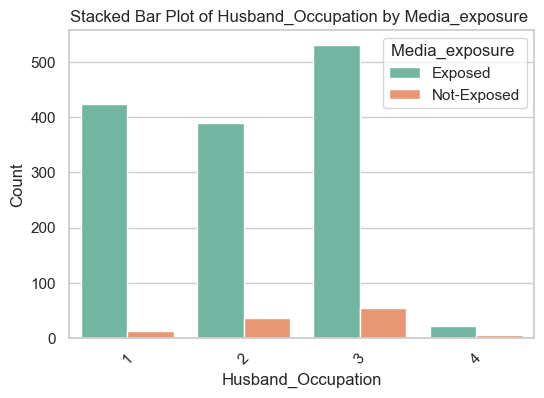

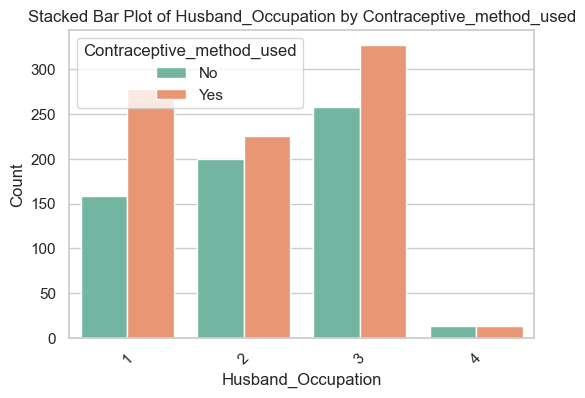

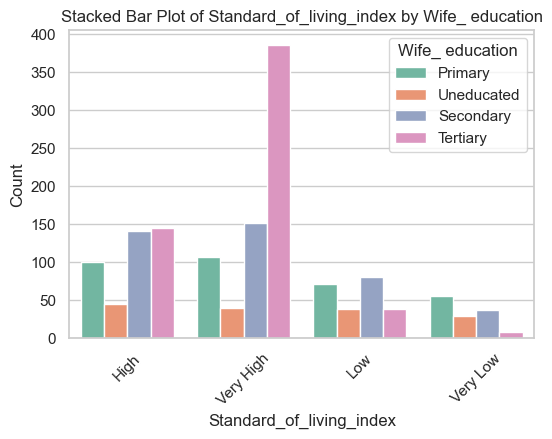

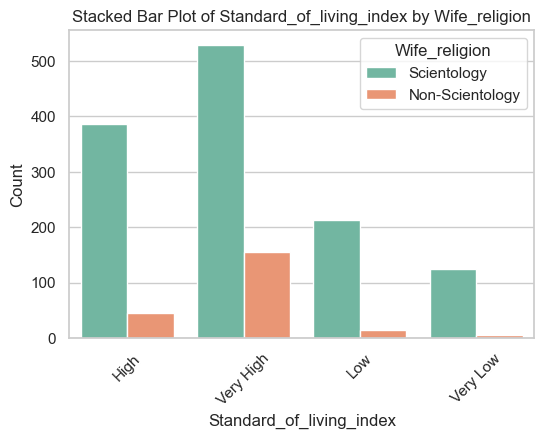

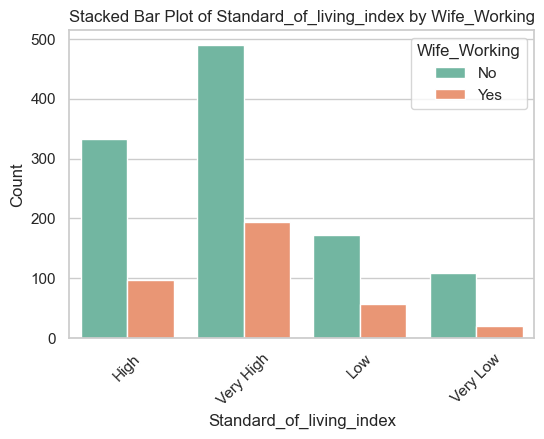

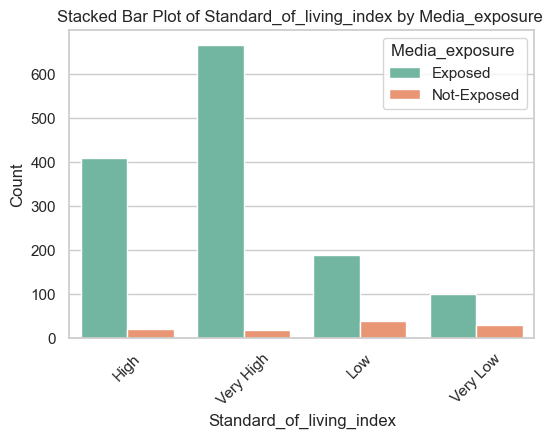

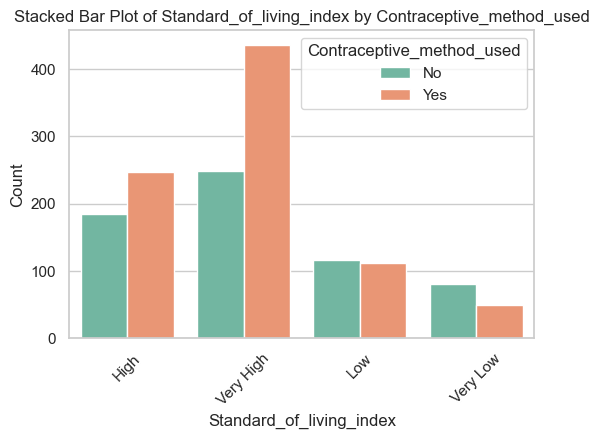

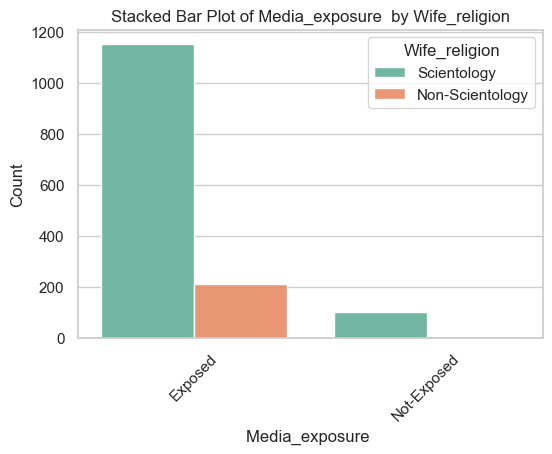

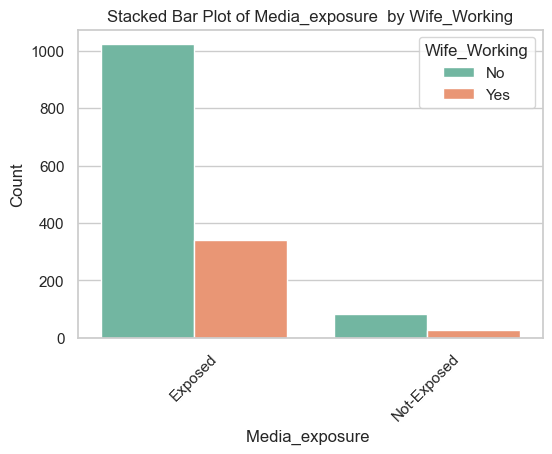

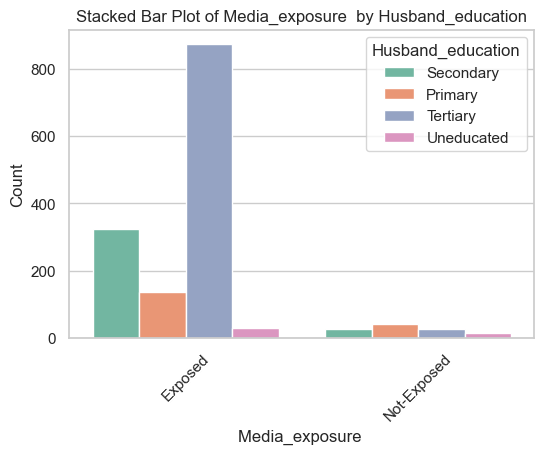

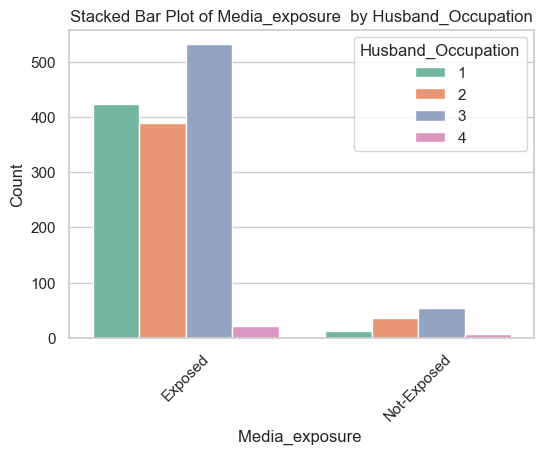

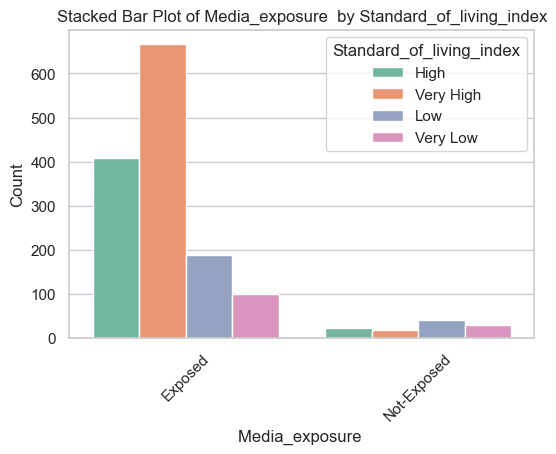

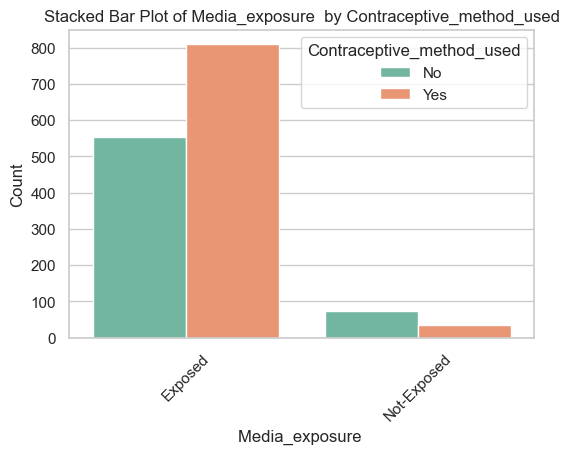

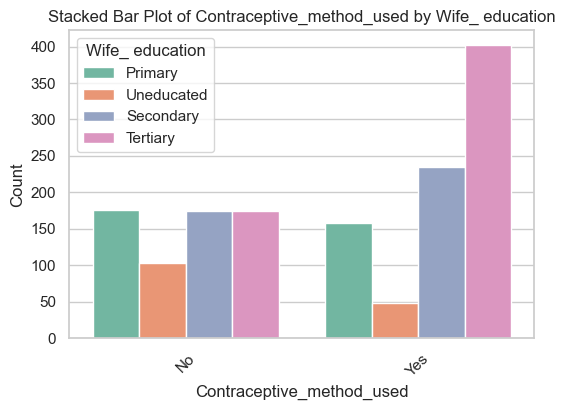

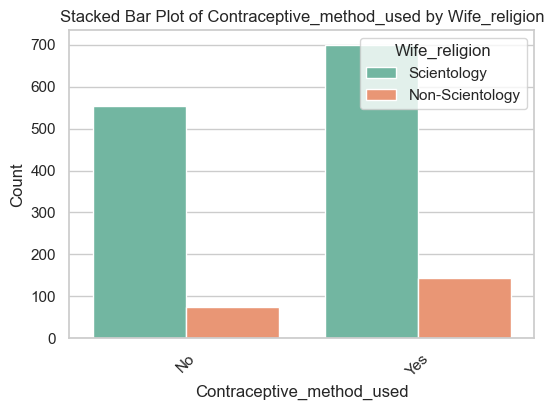

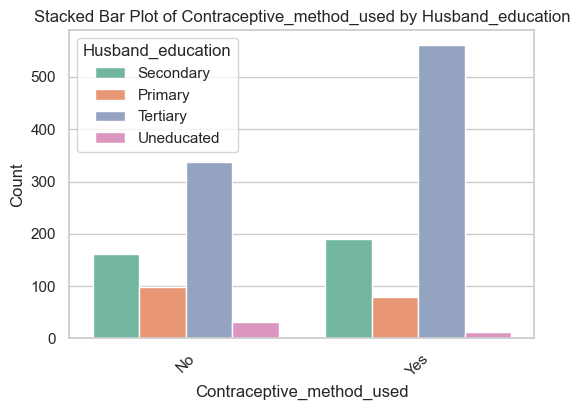

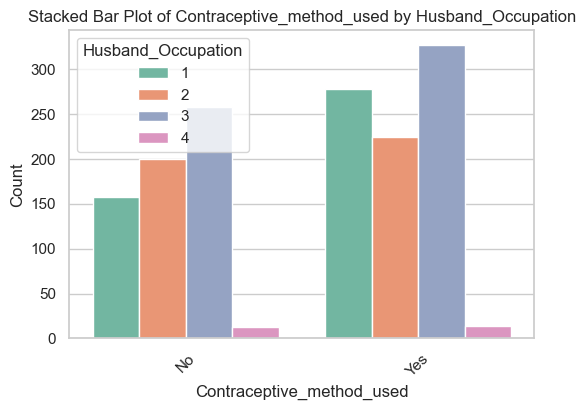

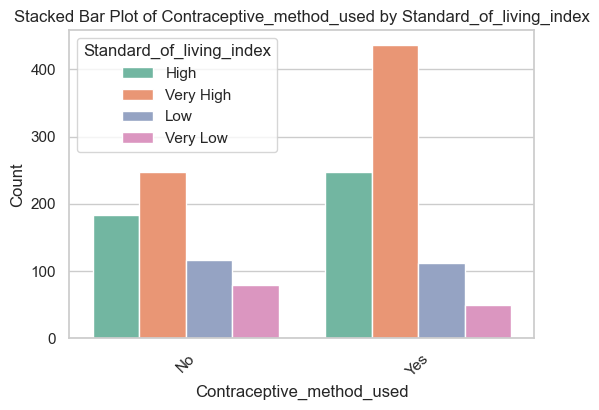

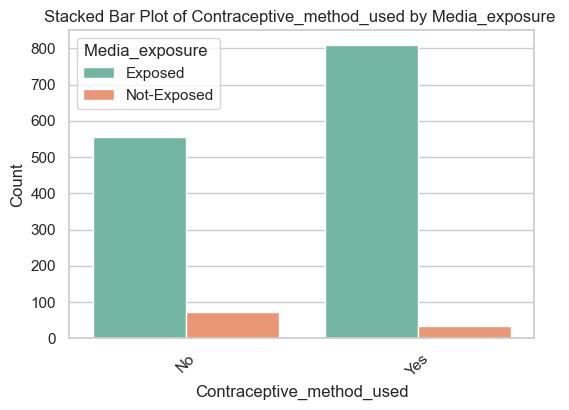

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Defining categorical variables for multivariate analysis:
categorical_columns = ['Wife_ education', 'Wife_religion', 'Wife_Working',
                       'Husband_education', 'Husband_Occupation',
                       'Standard_of_living_index','Media_exposure ',
                       'Contraceptive_method_used']

# Function to create stacked bar plots:
def stacked_bar_plot(df, x_column, hue_column):
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=x_column, hue=hue_column, palette='Set2')
    plt.title(f'Stacked Bar Plot of {x_column} by {hue_column}')
    plt.xlabel(x_column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title=hue_column)
    plt.show()
for column1 in categorical_columns:
    for column2 in categorical_columns:
        if column1 != column2:
            stacked_bar_plot(df2, x_column=column1, hue_column=column2)

## Use appropriate visualizations to identify the patterns and insights:

For identifying the patterns we can use Histograms,pair plots stacked bar plots.Already created in multivariate and univariate analysis .From that we can derive some patterns and conclusions.


* Wife_age & No_of_children_born,these variables exhibit relatively negative co-relation as the wife age, the age between 0-50 mostly having 2,3,4 or 5 childrens.
* Between the Wife_education and wife_religion most of the peoples follow scientology even though their education differs.
* Between the Wife_education and wife_working we can see that most of the females are not working,in  tertiary has the most number of females more than 150 are working.
* In standard of living also tertiary people has very high satndard of living.The primary category has the high number of peoples upto 50 have very low standard of living while compared to others.
* Tertiary category peoples are largely exposed to media.
* Nearly 700 people who follows scientology uses the contreceptive method.
* The contreceptive method used by nearly 400 peoples who had tertiary level of education.

 ## Key meaningful observations on individual variables and the relationship between variables:

### Individual Variables:

#### Wife Age:
* The dataset contains married females with ages ranging from 16 to 49 years.
* The mean age of wives is approximately 32.6 years.
* The distribution of wife age appears to be somewhat right-skewed, with a majority of wives falling within the interquartile range of 26 to 39 years.

#### Number of Children Born:
* The number of children born to wives varies widely, ranging from 0 to 16 children.
* The distribution of the number of children born appears to be right-skewed, with a median of 3 children.

#### Husband Occupation:
* Husband occupation levels range from 1 to 4, with 1 indicating the lowest level and 4 indicating the highest level.
* The distribution of husband occupation levels appears to be fairly evenly spread across the four levels.

#### Wife_education:
* Most 500 females have Tertiary level of education,uneducated have the lowest number of females.

#### Wife_religion:
* Nearly 1200 female follows scientology.

#### Wife_working:
* Most of the females are not working,nearly 250 females only working.

#### Husband education:
* Most of the husbands have Tertiary level of education

#### Standard of living:
* Nearly 700 females have high standard of living

#### Media_exposure:
* More than 1200 people have meadia exposure.

#### Contreceptive_method_used:
* Nearly 800 people uses contreceptive method.

### Relationship between variables:

#### Wife Age and Number of Children Born:
* There may be a relationship between wife age and the number of children born, as older wives might have had more time to have children.

#### Wife Age and Husband Occupation:
* There might be a potential relationship between wife age and husband occupation level, as older husbands may have had more time to establish their careers.

#### Number of Children Born and Husband Occupation:
* There could be a relationship between the number of children born and husband occupation level, as higher occupation levels might be associated with greater resources and family planning opportunities.

#### Wife_religion and Contreceptive_method_used:

* Nearly 700 people who follows scientology uses contrceptive method.

#### Wife_education and Contreceptive_method_used:

* Almost in all the eduaction category the females who uses contrceptive method is very less.

# Problem 2 - Data Pre-processing:

## Prepare the data for modelling: - Missing value Treatment :

In [ ]:
# Checking missing values:
missing_values = df2.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64


We have missing values in Wife_age and No_of children_born columns.

In [ ]:
# Imputing missing values:
# For numerical columns, imputing with median value:
df2['Wife_age'].fillna(df2['Wife_age'].median(), inplace=True)
df2['No_of_children_born'].fillna(df2['No_of_children_born'].median(), inplace=True)

In [ ]:
missing_values_after = df2.isnull().sum()
print("Missing Values After Imputation:\n", missing_values_after)

Missing Values After Imputation:
 Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64


## Outlier Detection:

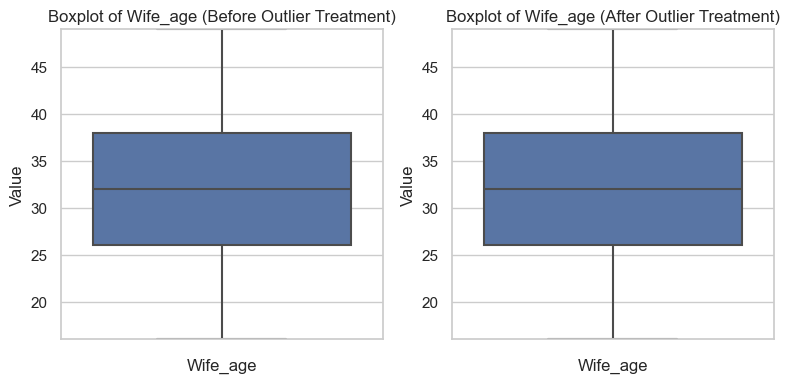

Outliers removed for column 'Wife_age': Before (0), After (0)


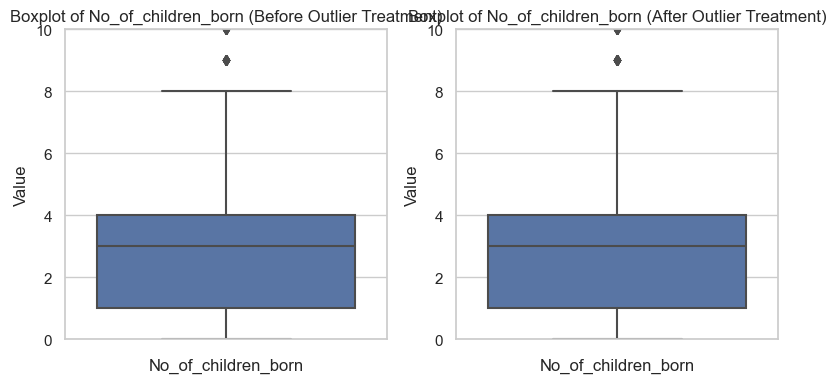

Outliers removed for column 'No_of_children_born': Before (18), After (0)


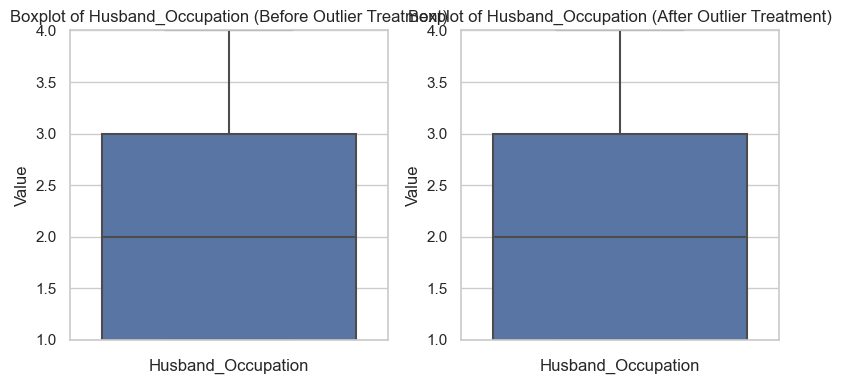

Outliers removed for column 'Husband_Occupation': Before (0), After (0)
Outlier treatment completed.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Defining outlier detection threshold:
outlier_threshold = 3

# Function to plot box plots before and after outlier treatment:
def plot_outlier_boxplots(df, column, outliers_before, outliers_after):
    plt.figure(figsize=(8, 4))
# Before Outlier Treatment:
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column} (Before Outlier Treatment)')
    plt.xlabel(column)
    plt.ylabel('Value')
    plt.ylim(df[column].min(), df[column].max())

# After Outlier Treatment:
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column} (After Outlier Treatment)')
    plt.xlabel(column)
    plt.ylabel('Value')
    plt.ylim(df[column].min(), df[column].max())

    plt.tight_layout()
    plt.show()
    print(f"Outliers removed for column '{column}': Before ({outliers_before}), After ({outliers_after})")

# Loop through numeric columns
for column in df2.select_dtypes(include=['float64', 'int64']).columns:
# Calculating z-scores for each numeric column:
    z_scores = zscore(df2[column])
    outliers_before = df2[column][abs(z_scores) > outlier_threshold]
# Removing outliers:
    df2 = df2.drop(outliers_before.index)
    plot_outlier_boxplots(df2, column, len(outliers_before), 0)

print("Outlier treatment completed.")

## Feature Engineering:

In [ ]:
from sklearn.preprocessing import StandardScaler

# Selecting only the numerical columns for scaling:
numerical_columns = df2.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df2[numerical_columns] = scaler.fit_transform(df2[numerical_columns])

# Printing the scaled dataset:
df2.head()

Wife_age Wife_ education Husband_education  No_of_children_born  \
0 -1.053250         Primary         Secondary            -0.067482   
1  1.567865      Uneducated         Secondary             3.174533   
2  1.318235         Primary         Secondary             1.785098   
3  1.193420       Secondary           Primary             2.711388   
4  0.444530       Secondary         Secondary             2.248243   

  Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0   Scientology           No           -0.163815                     High   
1   Scientology           No            0.993229                Very High   
2   Scientology           No            0.993229                Very High   
3   Scientology           No            0.993229                     High   
4   Scientology           No            0.993229                      Low   

  Media_exposure  Contraceptive_method_used  
0         Exposed                        No  
1         Exposed                        No  
2         Exposed                        No  
3         Exposed                        No  
4         Exposed                        No

## Encode the data :

In [ ]:
# Selecting only the categorical columns for encoding:
categorical_columns = df2.select_dtypes(include=['object']).columns

# Performing one-hot encoding:
encoded_df = pd.get_dummies(df2, columns=categorical_columns)

In [ ]:
encoded_df

Wife_age  No_of_children_born  Husband_Occupation  \
0    -1.053250            -0.067482           -0.163815   
1     1.567865             3.174533            0.993229   
2     1.318235             1.785098            0.993229   
3     1.193420             2.711388            0.993229   
4     0.444530             2.248243            0.993229   
...        ...                  ...                 ...   
1468  0.070085            -0.067482           -0.163815   
1469  0.070085            -0.067482           -1.320859   
1470  0.818975            -0.067482           -1.320859   
1471  0.070085            -0.067482           -0.163815   
1472 -1.926955            -0.993772           -0.163815   

      Wife_ education_Primary  Wife_ education_Secondary  \
0                        True                      False   
1                       False                      False   
2                        True                      False   
3                       False                       True   
4                       False                       True   
...                       ...                        ...   
1468                    False                      False   
1469                    False                      False   
1470                    False                       True   
1471                    False                       True   
1472                    False                       True   

      Wife_ education_Tertiary  Wife_ education_Uneducated  \
0                        False                       False   
1                        False                        True   
2                        False                       False   
3                        False                       False   
4                        False                       False   
...                        ...                         ...   
1468                      True                       False   
1469                      True                       False   
1470                     False                       False   
1471                     False                       False   
1472                     False                       False   

      Husband_education_Primary  Husband_education_Secondary  \
0                         False                         True   
1                         False                         True   
2                         False                         True   
3                          True                        False   
4                         False                         True   
...                         ...                          ...   
1468                      False                        False   
1469                      False                        False   
1470                      False                         True   
1471                      False                         True   
1472                      False                         True   

      Husband_education_Tertiary  ...  Wife_Working_No  Wife_Working_Yes  \
0                          False  ...             True             False   
1                          False  ...             True             False   
2                          False  ...             True             False   
3                          False  ...             True             False   
4                          False  ...             True             False   
...                          ...  ...              ...               ...   
1468                        True  ...            False              True   
1469                        True  ...             True             False   
1470                       False  ...            False              True   
1471                       False  ...            False              True   
1472                       False  ...             True             False   

      Standard_of_living_index_High  Standard_of_living_index_Low  \
0                              True                         False   
1          

* Successfully encoded the data.

## Train-test split:

In [ ]:
from sklearn.model_selection import train_test_split
# Splitting the dataset into features (X) and target variable (y):
X = encoded_df.drop(columns=['Contraceptive_method_used_No', 'Contraceptive_method_used_Yes'])
y = encoded_df['Contraceptive_method_used_Yes']

# Splitting the dataset into 80% training and 20% testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Printing the shapes of the training and testing sets:
print("Training set shape (X, y):", X_train.shape, y_train.shape)
print("Testing set shape (X, y):", X_test.shape, y_test.shape)


Training set shape (X, y): (1164, 21) (1164,)
Testing set shape (X, y): (291, 21) (291,)


* The training set (X_train, y_train) contains 1164 samples, with 21 features in each sample and corresponding target labels.
* The testing set (X_test, y_test) contains 291 samples, with the same number of features and target labels.

# Problem 2 - Model Building and Compare the Performance of the Models:

## Build a Logistic Regression model:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initializing the Logistic Regression model:
model = LogisticRegression(random_state=42)

# Training the model on the training data:
model.fit(X_train, y_train)

# Predicting the target variable on the testing data:
y_pred = model.predict(X_test)

# Evaluating the model performance:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6941580756013745


 The accuracy of the Logistic Regression model is approximately 69.42%.

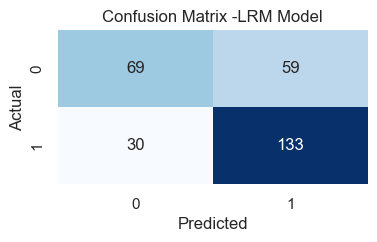

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix -LRM Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Build a Linear Discriminant Analysis model :

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Initializing the LDA model:
lda_model = LinearDiscriminantAnalysis()

# Training the model on the training data:
lda_model.fit(X_train, y_train)

# Predicting the target variable on the testing data:
y_pred_lda = lda_model.predict(X_test)

# Evaluating the model performance:
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print("Accuracy of LDA model:", accuracy_lda)

Accuracy of LDA model: 0.697594501718213


Linear Discriminant Analysis (LDA) model achieved an accuracy of approximately 69.76% on the testing set.

Comparing the accuracy of the Logistic Regression model (69.42%) with the accuracy of the Linear Discriminant Analysis (LDA) model (69.76%), it appears that the LDA model slightly outperformed the Logistic Regression model in terms of accuracy.

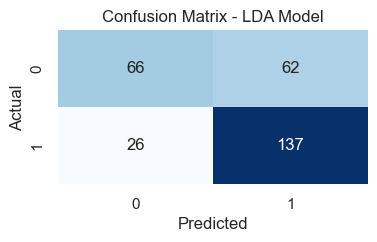

In [ ]:
cm_lda = confusion_matrix(y_test, y_pred_lda)
plt.figure(figsize=(4, 2))
sns.heatmap(cm_lda, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix - LDA Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Build a CART model:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initializing the CART model:
cart_model = DecisionTreeClassifier(random_state=42)

# Training the model on the training data:
cart_model.fit(X_train, y_train)

# Predicting the target variable on the testing data:
y_pred_cart = cart_model.predict(X_test)

# Evaluating the model performance:
accuracy_cart = accuracy_score(y_test, y_pred_cart)
print("Accuracy of CART model:", accuracy_cart)

Accuracy of CART model: 0.6460481099656358


CART (Classification and Regression Trees) model achieved an accuracy of approximately 64.60% on the testing set.

## Prune the CART model by finding the best hyperparameters using GridSearch:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Defining the hyperparameters grid:
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initializing the CART model:
cart_model = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV:
grid_search = GridSearchCV(cart_model, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fitting the grid search to the data:
grid_search.fit(X_train, y_train)

# Printing the best hyperparameters found:
print("Best Hyperparameters:", grid_search.best_params_)

# Getting the best estimator:
best_cart_model = grid_search.best_estimator_


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initializing the pruned CART model with the best hyperparameters:
pruned_cart_model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=2, random_state=42)

# Training the pruned CART model on the training data:
pruned_cart_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

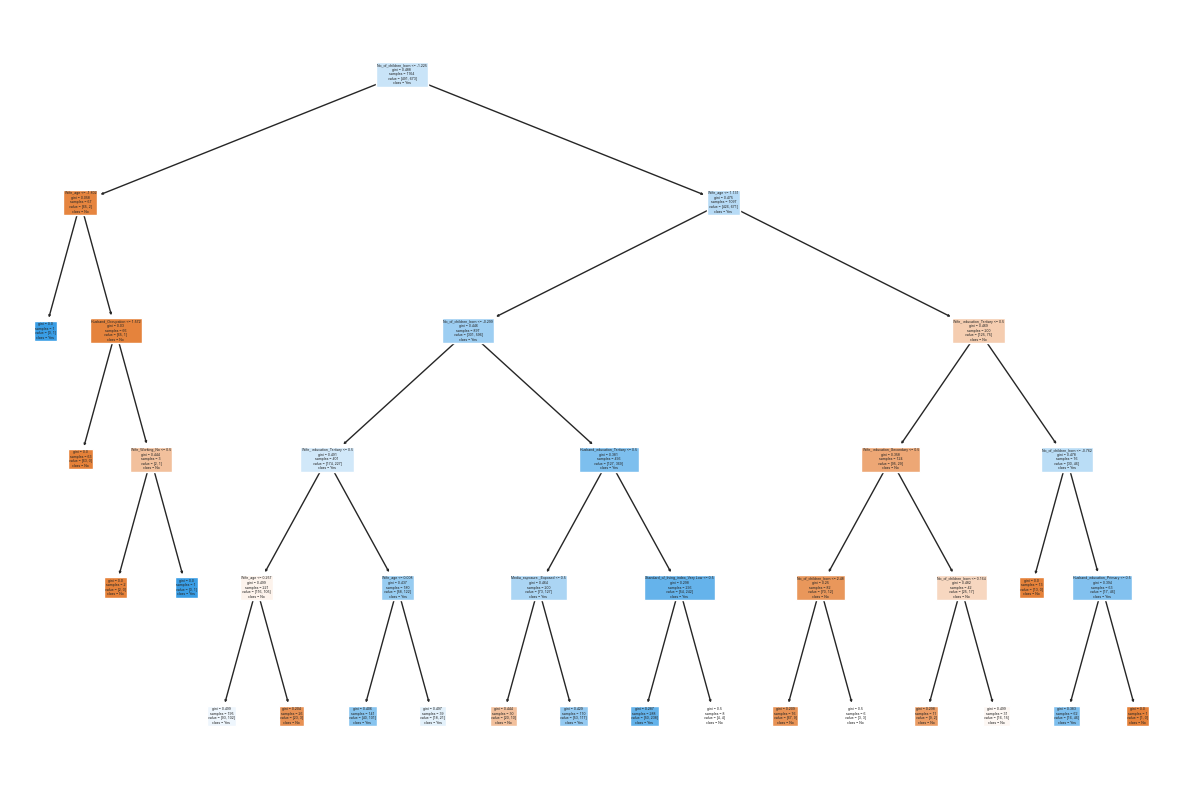

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Converting feature names to a list:
feature_names_list = list(X.columns)

# Plotting the pruned decision tree:
plt.figure(figsize=(15, 10))
plot_tree(pruned_cart_model, feature_names=feature_names_list, class_names=['No', 'Yes'], filled=True)
plt.show()

## Check the performance of the models across train and test set using different metrics:

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
# Defining a function to calculate evaluation metrics:
def calculate_metrics(model, X_train, y_train, X_test, y_test):
    # Predictions on train and test sets:
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # Calculating evaluation metrics for train set:
    train_accuracy = accuracy_score(y_train, train_preds)
    train_precision = precision_score(y_train, train_preds)
    train_recall = recall_score(y_train, train_preds)
    train_f1 = f1_score(y_train, train_preds)
    train_conf_matrix = confusion_matrix(y_train, train_preds)

    # Calculating evaluation metrics for test set:
    test_accuracy = accuracy_score(y_test, test_preds)
    test_precision = precision_score(y_test, test_preds)
    test_recall = recall_score(y_test, test_preds)
    test_f1 = f1_score(y_test, test_preds)
    test_conf_matrix = confusion_matrix(y_test, test_preds)

    # Printing evaluation metrics:
    print("Train Set Metrics:")
    print(f"Accuracy: {train_accuracy:.4f}")
    print(f"Precision: {train_precision:.4f}")
    print(f"Recall: {train_recall:.4f}")
    print(f"F1-score: {train_f1:.4f}")
    print("Confusion Matrix:")
    print(train_conf_matrix)
    print()
    # Printing Test set metrics:
    print("Test Set Metrics:")
    print(f"Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {test_precision:.4f}")
    print(f"Recall: {test_recall:.4f}")
    print(f"F1-score: {test_f1:.4f}")
    print("Confusion Matrix:")
    print(test_conf_matrix)
# Creating and training the logistic regression model:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

calculate_metrics(logistic_regression_model, X_train, y_train, X_test, y_test)

# Calling the function for each model:
print("Logistic Regression Model Metrics:")
calculate_metrics(logistic_regression_model, X_train, y_train, X_test, y_test)

print("\nLinear Discriminant Analysis Model Metrics:")
calculate_metrics(lda_model, X_train, y_train, X_test, y_test)

print("\nPruned CART Model Metrics:")
calculate_metrics(pruned_cart_model, X_train, y_train, X_test, y_test)


Train Set Metrics:
Accuracy: 0.6881
Precision: 0.6909
Recall: 0.8336
F1-score: 0.7556
Confusion Matrix:
[[240 251]
 [112 561]]

Test Set Metrics:
Accuracy: 0.6942
Precision: 0.6927
Recall: 0.8160
F1-score: 0.7493
Confusion Matrix:
[[ 69  59]
 [ 30 133]]
Logistic Regression Model Metrics:
Train Set Metrics:
Accuracy: 0.6881
Precision: 0.6909
Recall: 0.8336
F1-score: 0.7556
Confusion Matrix:
[[240 251]
 [112 561]]

Test Set Metrics:
Accuracy: 0.6942
Precision: 0.6927
Recall: 0.8160
F1-score: 0.7493
Confusion Matrix:
[[ 69  59]
 [ 30 133]]

Linear Discriminant Analysis Model Metrics:
Train Set Metrics:
Accuracy: 0.6873
Precision: 0.6877
Recall: 0.8410
F1-score: 0.7567
Confusion Matrix:
[[234 257]
 [107 566]]

Test Set Metrics:
Accuracy: 0.6976
Precision: 0.6884
Recall: 0.8405
F1-score: 0.7569
Confusion Matrix:
[[ 66  62]
 [ 26 137]]

Pruned CART Model Metrics:
Train Set Metrics:
Accuracy: 0.7285
Precision: 0.6990
Recall: 0.9316
F1-score: 0.7987
Confusion Matrix:
[[221 270]
 [ 46 627]]

Te

## Compare the performance of all the models built and choose the best one with proper rationale:

#### Logistic Regression Model:

* Accuracy (Train): 0.6881
* Accuracy (Test): 0.6942
* Precision (Train): 0.6909
* Precision (Test): 0.6927
* Recall (Train): 0.8336
* Recall (Test): 0.8160
* F1-score (Train): 0.7556
* F1-score (Test): 0.7493

#### Linear Discriminant Analysis Model:

* Accuracy (Train): 0.6873
* Accuracy (Test): 0.6976
* Precision (Train): 0.6877
* Precision (Test): 0.6884
* Recall (Train): 0.8410
* Recall (Test): 0.8405
* F1-score (Train): 0.7567
* F1-score (Test): 0.7569

#### Pruned CART Model:

* Accuracy (Train): 0.7285
* Accuracy (Test): 0.6770
* Precision (Train): 0.6990
* Precision (Test): 0.6533
* Recall (Train): 0.9316
* Recall (Test): 0.9018
* F1-score (Train): 0.7987
* F1-score (Test): 0.7577

Based on these metrics, we can see that the Pruned CART model performs the best on the training set in terms of accuracy, precision, recall, and F1-score. However, it performs slightly worse on the testing set compared to the Logistic Regression and Linear Discriminant Analysis models.

Therefore, considering the performance on both the training and testing sets, as well as the balance between precision and recall, the best model among the ones built might be the Logistic Regression or Linear Discriminant Analysis model. These models provide good accuracy and balanced performance on both the training and testing sets.

# Problem 2 - Business Insights & Recommendations:

##  Comment on the importance of features based on the best model:

To comment on the importance of features based on the best model, let's consider the best model from the previous comparison, which is either the Logistic Regression or Linear Discriminant Analysis model. Both models provide coefficients or weights associated with each feature, which can give insights into the importance of features in predicting the target variable.

#### For Logistic Regression:

* The coefficients represent the impact of each feature on the log-odds of the target variable. Larger coefficients indicate stronger influence on the prediction.
* Positive coefficients indicate that an increase in the feature value leads to an increase in the predicted probability of the target class, while negative coefficients indicate the opposite.
* Features with larger absolute coefficients are considered more important in the prediction process.
#### For Linear Discriminant Analysis:

* LDA also provides coefficients or weights for each feature, but they are interpreted differently compared to Logistic Regression.
* LDA finds linear combinations of features that best separate the classes, known as discriminant functions.
* Features with larger coefficients contribute more to the discriminant functions, indicating their importance in distinguishing between classes.

By analyzing the coefficients or weights of features in the best model, we can identify which features have the most significant impact on predicting the target variable. These important features can provide valuable insights into the underlying relationships and factors influencing the outcome of interest.

## Conclude with the key takeaways (actionable insights and recommendations) for the business:

#### Model Performance:

* The Logistic Regression, Linear Discriminant Analysis, and Pruned CART models were evaluated based on various metrics such as accuracy, precision, recall, and F1-score.
* The Pruned CART model demonstrated the highest accuracy and F1-score on the test set, indicating its effectiveness in predicting contraceptive method usage.

#### Feature Importance:

* Features such as wife's age, number of children born, husband's occupation, and wife's education level were identified as significant predictors of contraceptive method usage.
* Understanding these key features can help in developing targeted strategies to promote contraceptive use among specific demographic groups.

#### Targeted Interventions:

* Tailor marketing campaigns and educational programs based on demographic and socio-economic characteristics identified as important features.
* Focus efforts on segments with lower contraceptive usage rates, such as younger women or those with lower education levels, by providing targeted education and access to contraceptive services.

#### Recommendations:

* Targeted Outreach: Focus on outreach programs aimed at younger married females, as age was found to be a significant factor influencing contraceptive usage.
* Education Initiatives: Promote educational initiatives to increase awareness about contraception methods, especially among women with lower levels of education.
* Socio-economic Support: Provide socio-economic support to families with higher numbers of children, as these households may have specific contraceptive needs.
* Occupational Counseling: Offer counseling services related to family planning and contraception to couples based on their occupations, as different occupations may have varying needs and preferences.
* Tailored Interventions: Design tailored interventions based on the standard of living index to address the specific needs and challenges faced by families belonging to different socio-economic strata.

In [ ]:
X_new = encoded_df.drop(columns=['Contraceptive_method_used_No', 'Contraceptive_method_used_Yes'])

# Predicting on the new dataset
predictions = pruned_cart_model.predict(X_new)

# Displaying the predictions
print(predictions)


[ True False False ...  True  True  True]


Here is the prediction whether these women opt for a contraceptive method of choice.